# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Импорт компонентов, библиотек и модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета, изучение данных. 

In [2]:
try:
    data=pd.read_csv(r'C:\Users\a1\Desktop\real_estate_data.csv')
except:
    data=pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
data.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Всего 21 технических наименований из таблицы, а именно:
    
- airports_nearest: расстояние до ближайшего аэропорта в метрах (м);
- balcony: число балконов;
- ceiling_height: высота потолков (м);
- cityCenters_nearest: расстояние до центра города (м);
- days_exposition: сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition: дата публикации;
- floor: этаж;
- floors_total: всего этажей в доме;
- is_apartment: апартаменты (булев тип);
- kitchen_area: площадь кухни в квадратных метрах (м²);
- last_price: цена на момент снятия с публикации;
- living_area: жилая площадь в квадратных метрах (м²);
- locality_name: название населённого пункта;
- open_plan: свободная планировка (булев тип);
- parks_around3000: число парков в радиусе 3 км;
- parks_nearest: расстояние до ближайшего парка (м);
- ponds_around3000: число водоёмов в радиусе 3 км;
- ponds_nearest: расстояние до ближайшего водоёма (м);
- rooms: число комнат;
- studio: квартира-студия (булев тип);
- total_area: площадь квартиры в квадратных метрах (м²);
- total_images: число фотографий квартиры в объявлении.

Видим, что данные нужно разъединить..

In [4]:
try:
    data=pd.read_csv(r'C:\Users\a1\Desktop\real_estate_data.csv', sep='\t')
except:
    data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [5]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проверим распределение значений в таблице...

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
pd.options.display.float_format = '{:.2f}'.format

<AxesSubplot:title={'center':'Соотношение потерянных данных'}>

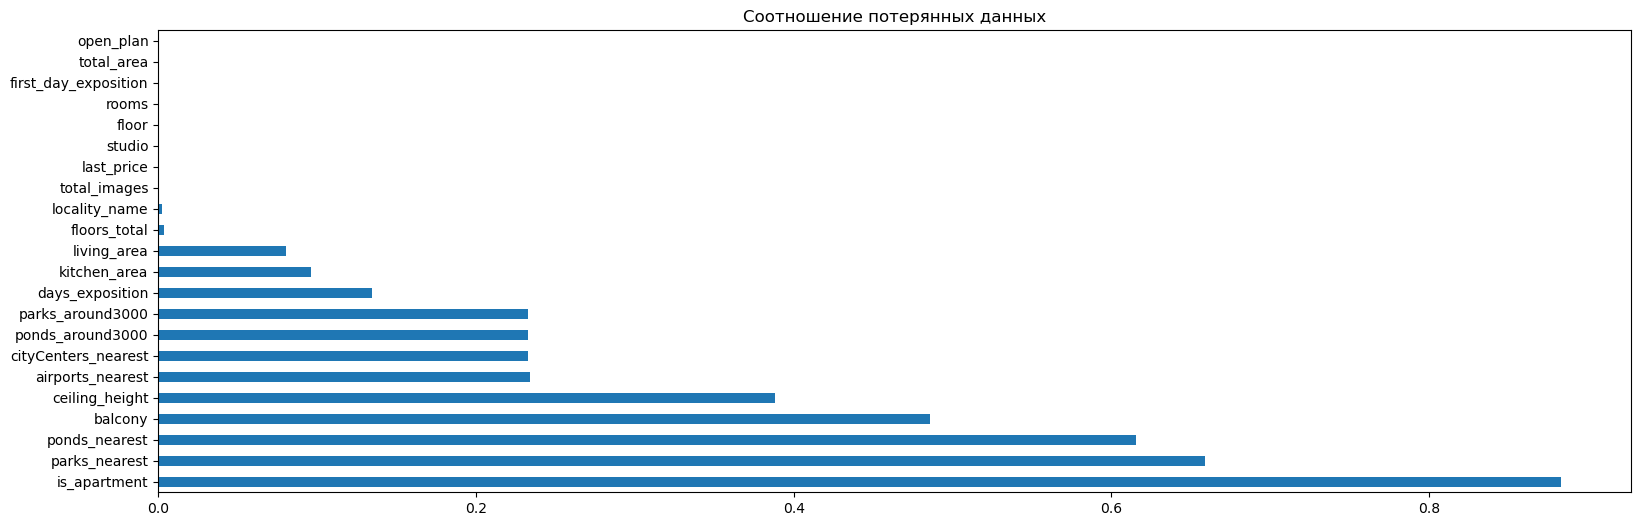

In [9]:
(
    data
     .isna()
     .mean()
     .sort_values(ascending=False)
     .plot(kind='barh', figsize=(19,6), legend=False, title='Соотношение потерянных данных')
)

Как и ожидалось, данные содержат пропуски, аномальные значения, что-то из данных потеряно и многое другое, с чем ещё придётся разбираться...

Столбец "total_images"

In [10]:
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

<AxesSubplot:title={'center':'Соотношение фотографий в обьявлениях'}, xlabel='Количество фотографий в одном объявлении, шт', ylabel='Количество фотографий, всего, шт'>

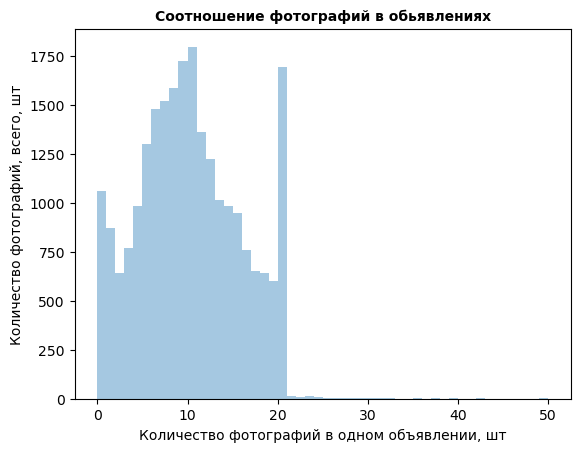

In [11]:
plt.title("Соотношение фотографий в обьявлениях", fontweight='bold', size='medium')
plt.ylabel("Количество фотографий, всего, шт")
sns.distplot(a=data['total_images'], kde=False, rug=False, axlabel="Количество фотографий в одном объявлении, шт")

Аномалий нет. 
Объявления без фото - бывают, 50 фото в объявлениях - вполне вероятно. 
Пик на 20 фотографиях, возможно, связан с техническими или коммерческими ограничениями на публикацию фотографий к объявлению.

Столбец "last_price"

In [12]:
data['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Разброс от 12 тысяч до 763 милионов. От съема комнаты до продажи элитных жилых особняков и, скорее всего графских поместий.

<AxesSubplot:title={'center':'Цена на момент снятия с публикации из объявлений'}, xlabel='Цена, сотня милионов руб', ylabel='Количество публикаций, шт'>

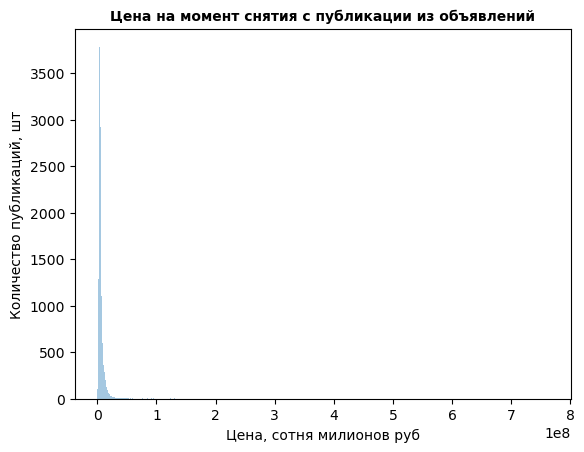

In [13]:
plt.title("Цена на момент снятия с публикации из объявлений", fontweight='bold', size='medium')
plt.ylabel("Количество публикаций, шт")
sns.distplot(a=data['last_price'], bins=1000, kde=False, rug=False, axlabel="Цена, сотня милионов руб")

Столбец "total_area"

In [14]:
data['total_area'].describe()

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Общая площадь квартир из объявлений'}, xlabel='Общая площадь, кв. м', ylabel='Количество объявлений, шт'>

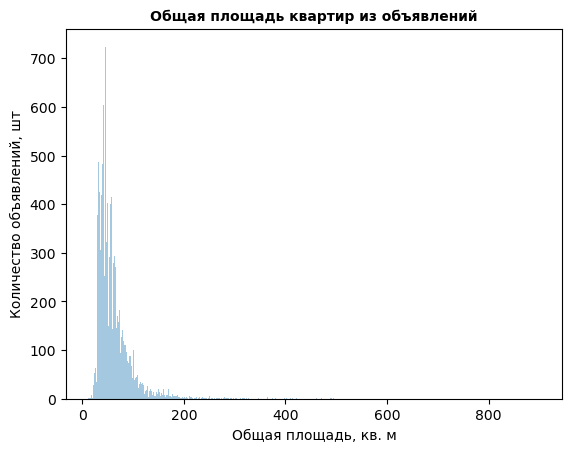

In [15]:
plt.title("Общая площадь квартир из объявлений", fontweight='bold', size='medium')
plt.ylabel("Количество объявлений, шт")
sns.distplot(a=data['total_area'], bins=1000, kde=False, rug=False, axlabel="Общая площадь, кв. м")

Как и предполагалось, пик продаж примерно на 50 кв. метрах. 
Это однокомнатные и маленькие двухкомнатные квартиры. 
Бюджетное жильё.

Столбец "first_day_exposition"

In [16]:
data['first_day_exposition'].sort_values().unique()

array(['2014-11-27T00:00:00', '2014-11-29T00:00:00',
       '2014-12-04T00:00:00', ..., '2019-05-01T00:00:00',
       '2019-05-02T00:00:00', '2019-05-03T00:00:00'], dtype=object)

По этому столбцу необходимо будет изменить тип данных, позже.

Столбец "rooms"

In [17]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

<AxesSubplot:title={'center':'Число комнат в квартирах из объявлений'}, xlabel='Число комнат, шт', ylabel='Количество, шт'>

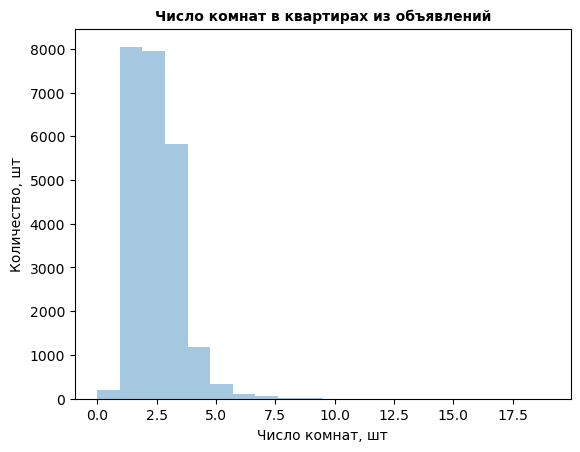

In [18]:
plt.title("Число комнат в квартирах из объявлений", fontweight='bold', size='medium')
plt.ylabel("Количество, шт")
sns.distplot(a=data['rooms'], bins=20, kde=False, rug=False, axlabel="Число комнат, шт")

Посмотрим, сколько квартир без комнат:

In [19]:
data[data['rooms'] == 0]['rooms'].value_counts()

0    197
Name: rooms, dtype: int64

197 безкомнатных квартир. Разберёмся что с ними не так...

In [20]:
data[data['rooms'] == 0].head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.00,27.00,2017-03-30T00:00:00,0,NaN,24.00,15.50,2,NaN,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00
349,4,2320000.00,25.00,2017-09-27T00:00:00,0,NaN,14.00,17.00,1,NaN,...,NaN,0.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
440,8,2480000.00,27.11,2018-03-12T00:00:00,0,NaN,17.00,24.75,4,NaN,...,NaN,2.00,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00
508,0,3375000.00,34.40,2017-03-28T00:00:00,0,NaN,26.00,24.30,19,NaN,...,NaN,1.00,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00
608,2,1850000.00,25.00,2019-02-20T00:00:00,0,NaN,10.00,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00
697,12,2500000.00,24.10,2017-12-01T00:00:00,0,2.75,25.00,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.00
716,5,1500000.00,17.00,2017-06-07T00:00:00,0,2.70,9.00,12.00,1,NaN,...,NaN,0.00,посёлок Шушары,18654.00,29846.00,0.00,NaN,0.00,NaN,40.00
780,9,2600000.00,26.10,2018-02-20T00:00:00,0,NaN,18.00,NaN,8,NaN,...,NaN,1.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
839,14,1900000.00,35.00,2017-04-14T00:00:00,0,2.70,5.00,15.00,3,False,...,NaN,1.00,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.00
946,5,2200000.00,23.00,2016-09-27T00:00:00,0,NaN,27.00,18.00,7,NaN,...,NaN,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.00


Выборка безкомнатных квартир на 50 строк показала, что максимальная жилая площадь для этого типа жилья не превышает 26 кв. метров. То есть такие квартиры однокомнатные и вероятнее всего большая часть из них - это студии. 

Вывод по данному столбцу: большей частью в объявлениях квартиры с одной, двумя и реже тремя комнатами. 

Столбец "ceiling_height"

In [21]:
data['ceiling_height'].describe()

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64

In [22]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

<AxesSubplot:title={'center':'Высота потолков в квартирах из объявлений'}, xlabel='Высота потолков, м', ylabel='Количество объявлений, шт'>

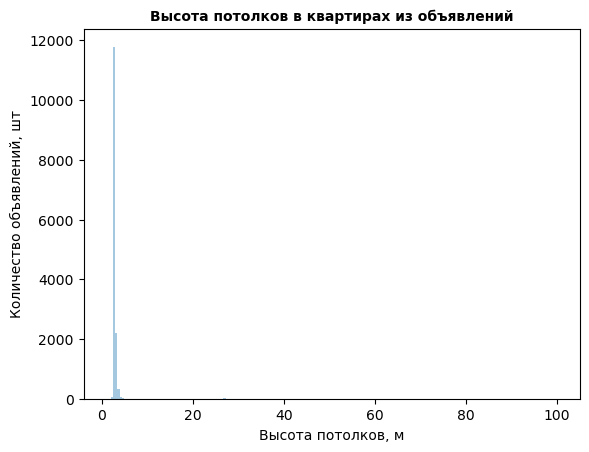

In [23]:
plt.title("Высота потолков в квартирах из объявлений", fontweight='bold', size='medium')
plt.ylabel("Количество объявлений, шт")
sns.distplot(a=data['ceiling_height'], bins=200, kde=False, rug=False, axlabel="Высота потолков, м")

Позже этот столбец будет обработан, с минимальной высотой для квартир в 2,4 метра (минимальная норма для России) и максимальной в 6 метров (двухярусные квартиры с высоким залом). Всё, что выходит за эти высоты будет купированно как аномалии. 

Столбец "floors_total"

In [24]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

В соответствии с Википедией (https://ru.wikipedia.org/wiki/Список_самых_высоких_зданий_Санкт-Петербурга) вполне вероятна продажа жилых помещений в зданиях в СПб и его окресностях с этажностью в 60 этажей.
Поэтому останется форматировать значения этажности и разобраться с пропусками. 

Столбец "living_area"

<AxesSubplot:title={'center':'Жилая площадь в квартирах'}, xlabel='Жилая площадь, кв. м', ylabel='Количество объявлений, шт'>

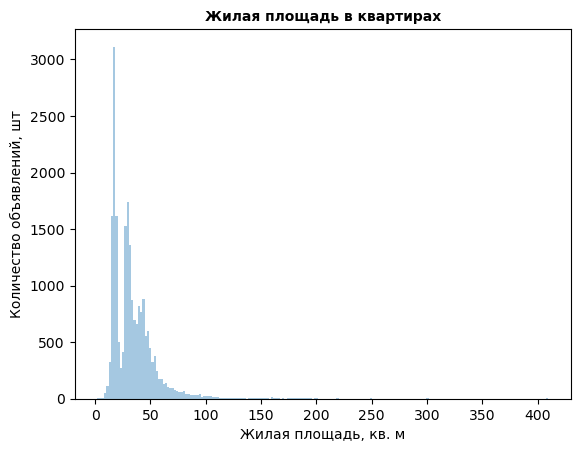

In [25]:
plt.title("Жилая площадь в квартирах", fontweight='bold', size='medium')
plt.ylabel("Количество объявлений, шт")
sns.distplot(a=data['living_area'], bins=200, kde=False, rug=False, axlabel="Жилая площадь, кв. м")

В соответствии с графиком, наблюдаем характерные пики, которые можно определить как типовые для оно, двух и комнатных квартир, что проверим позже.

Сейчас проверим данные на ошибки, например перепутанны ли значения для жилой и общей площади этих квартир.

In [26]:
data.query('living_area > total_area')['living_area'].count()

0

Ошибок нет. Теперь разберёмся с пропусками и решим что с ними делать дальше.

In [27]:
data.query('living_area.isnull()').describe() #читаем описание среза данных по квартирам с пропусками по жилой площади..

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,1903.00,1903.00,1903.00,1903.00,797.00,1870.00,0.00,1903.00,439.00,498.00,1278.00,1280.00,1280.00,577.00,1280.00,695.00,1705.00
mean,8.03,6999935.57,63.32,2.06,2.74,10.99,NaN,5.92,13.09,1.17,29150.43,13602.30,0.63,528.93,0.84,504.29,136.65
std,5.43,11108835.54,45.07,1.06,0.32,6.90,NaN,5.07,7.96,1.22,12366.09,7799.71,0.82,395.71,0.96,285.80,197.21
min,0.00,430000.00,13.00,0.00,2.00,1.00,NaN,1.00,4.00,0.00,7019.00,318.00,0.00,9.00,0.00,16.00,2.00
25%,4.00,3070000.00,41.00,1.00,2.50,5.00,NaN,2.00,8.70,0.00,19339.00,8370.00,0.00,302.00,0.00,246.50,45.00
50%,7.00,4500000.00,53.00,2.00,2.65,9.00,NaN,4.00,10.94,1.00,27116.00,12962.50,0.00,470.00,1.00,493.00,60.00
75%,11.00,7000000.00,71.00,3.00,2.80,16.00,NaN,8.00,14.22,2.00,37434.00,16554.50,1.00,649.00,1.00,723.00,133.00
max,20.00,230000000.00,631.00,9.00,5.60,35.00,NaN,27.00,60.00,5.00,69059.00,52895.00,3.00,2489.00,3.00,1293.00,1489.00


In [28]:
data.query('living_area.notnull()').describe() #читаем описание среза данных по квартирам без пропусков по жилой площади..

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21796.00,21796.00,21796.00,21796.00,13707.00,21743.00,21796.00,21796.00,20982.00,11682.00,16879.00,16900.00,16901.00,7502.00,16901.00,8415.00,18813.00
mean,10.02,6501527.20,60.09,2.07,2.77,10.65,34.46,5.89,10.52,1.15,28766.66,14235.89,0.61,487.87,0.77,519.11,184.90
std,5.68,10866772.94,34.70,1.08,1.29,6.57,22.03,4.87,5.84,1.06,12650.65,8665.14,0.80,337.71,0.94,277.03,221.22
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3450000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18539.00,9289.00,0.00,287.00,0.00,297.00,44.00
50%,10.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.00,1.00,26662.00,13107.00,0.00,451.00,0.00,503.00,101.00
75%,14.00,6750000.00,69.60,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37227.00,16272.00,1.00,610.00,1.00,730.00,239.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Вывод напрашивается сам собой, в связи со схожестью данных: пропуски случайны и их можно коррелировать через коэффициент зависимости жилой площади от общей для квартир без пропусков по жилой площади и по этому коэффициенту пересчитать значения для жилой площади для квартир с пропусками. 

In [29]:
total_area_to_living_area = (
    data.query('living_area.notnull()')['living_area']/data.query('living_area.notnull()')['total_area']
).mean()

total_area_to_living_area

0.5647655216993298

в дальнейшем этот коэффициент нам пригодится..

Столбец "floor"

In [30]:
data['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

<AxesSubplot:title={'center':'Этаж в квартирах из объявлений'}, xlabel='Этаж', ylabel='Общее количество объявлений, шт'>

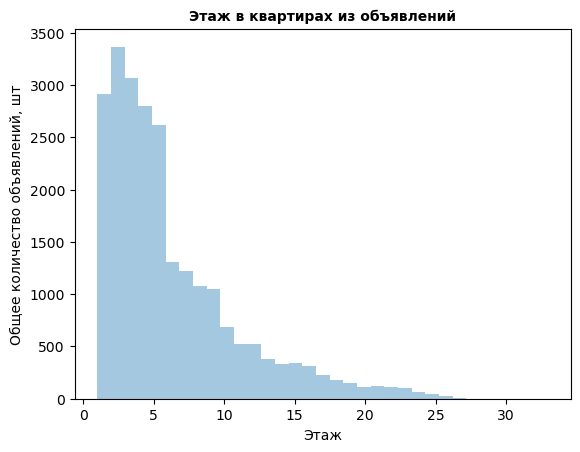

In [31]:
plt.title("Этаж в квартирах из объявлений", fontweight='bold', size='medium')
plt.ylabel("Общее количество объявлений, шт")
sns.distplot(a=data['floor'], bins=33, kde=False, rug=False, axlabel="Этаж")

Пропусков нет, нулевых и минусовых этажей нет. Выглядит всё адекватным.

Столбец "is_apartment"

Булевы значения...

In [32]:
data['is_apartment'].sort_values().unique()

array([False, True, nan], dtype=object)

In [33]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

..с учётом большого количества пропусков, которые, вероятнее всего не аппартаменты.

Столбец "studio"

И снова булевы значения.

In [34]:
data['studio'].sort_values().unique()

array([False,  True])

Пропусков нет, и на этом по студиям анализа достаточно.

Столбец "open_plan"

Опять булевы значения.

In [35]:
data['studio'].sort_values().unique()

array([False,  True])

Пропусков нет, и на этом по открытой планировке анализа достаточно.

Столбец "kitchen_area"

In [36]:
data['kitchen_area'].describe()

count   21421.00
mean       10.57
std         5.91
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Площадь кухни в квартирах'}, xlabel='Площадь кухни, кв. м', ylabel='Количество объявлений, шт'>

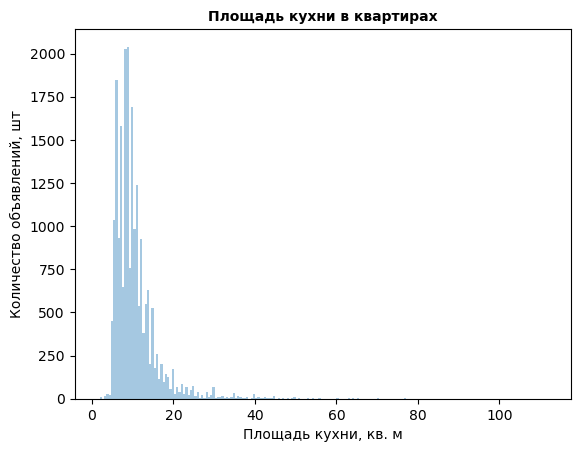

In [37]:
plt.title("Площадь кухни в квартирах", fontweight='bold', size='medium')
plt.ylabel("Количество объявлений, шт")
sns.distplot(a=data['kitchen_area'], bins=200, kde=False, rug=False, axlabel="Площадь кухни, кв. м")

В объявлениях есть пропуски. Но сперва проверим, не перепутанны ли значения для кухонь и общей площади этих квартир...

In [38]:
data.query('kitchen_area > total_area')['kitchen_area'].count()

0

Ошибок нет. Теперь разберёмся с пропусками и решим что с ними делать дальше.

In [39]:
data.query('kitchen_area.isnull()').describe() #читаем описание среза данных по квартирам с пропусками по площади кухонь...

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,2278.00,2278.00,2278.00,2278.00,940.00,2231.00,814.00,2278.00,0.00,729.00,1561.00,1563.00,1563.00,690.00,1563.00,844.00,2075.00
mean,8.10,6518243.97,56.58,1.83,2.86,11.51,29.65,6.21,NaN,0.87,28665.82,13932.82,0.62,518.11,0.80,515.28,139.28
std,5.52,18536418.05,40.86,1.19,1.58,7.12,24.30,5.32,NaN,1.00,12667.45,8187.74,0.82,377.81,0.91,281.88,189.46
min,0.00,430000.00,12.00,0.00,2.00,1.00,2.00,1.00,NaN,0.00,6989.00,410.00,0.00,4.00,0.00,16.00,2.00
25%,4.00,2799250.00,34.00,1.00,2.55,5.00,17.05,2.00,NaN,0.00,18732.00,8523.00,0.00,293.50,0.00,293.00,45.00
50%,7.00,4000000.00,46.00,2.00,2.70,9.00,20.00,5.00,NaN,1.00,26447.00,13222.00,0.00,462.50,1.00,498.00,60.00
75%,12.00,6200000.00,64.72,3.00,2.80,17.00,33.00,8.00,NaN,2.00,37227.00,16606.50,1.00,637.00,1.00,719.75,145.00
max,21.00,763000000.00,500.00,9.00,27.00,35.00,250.00,27.00,NaN,5.00,73391.00,54490.00,3.00,2467.00,3.00,1293.00,1489.00


In [40]:
data.query('kitchen_area.notnull()').describe() #читаем описание среза данных по квартирам без пропусков по площади кухонь..

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21421.00,21421.00,21421.00,21421.00,13564.00,21382.00,20982.00,21421.00,21421.00,11451.00,16596.00,16617.00,16618.00,7389.00,16618.00,8266.00,18443.00
mean,10.05,6544027.10,60.75,2.10,2.77,10.59,34.64,5.86,10.57,1.17,28805.70,14215.59,0.61,488.25,0.77,518.26,185.57
std,5.67,9726604.47,35.03,1.06,1.24,6.53,21.92,4.84,5.91,1.07,12627.75,8646.74,0.80,338.73,0.94,277.31,222.39
min,0.00,12190.00,14.00,1.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3500000.00,40.60,1.00,2.51,5.00,18.80,2.00,7.00,0.00,18574.75,9289.00,0.00,287.00,0.00,294.00,45.00
50%,10.00,4700000.00,52.50,2.00,2.65,9.00,30.10,4.00,9.10,1.00,26757.00,13094.00,0.00,453.00,0.00,503.00,102.00
75%,14.00,6800000.00,70.00,3.00,2.80,15.00,42.55,8.00,12.00,2.00,37275.50,16270.00,1.00,611.00,1.00,730.00,239.00
max,50.00,420000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Делаем тоже, что и для жилой площади, а именно коррелируем через коэффициент зависимость площади кухонь от общей для квартир без пропусков по площади кухонь и по этому коэффициенту пересчитываем значения для площади кухонь для квартир с пропусками. 

In [41]:
total_area_to_kitchen_area = (
    data.query('kitchen_area.notnull()')['kitchen_area']/data.query('kitchen_area.notnull()')['total_area']
).mean()
total_area_to_kitchen_area

0.18735473877173864

в дальнейшем этот коэффициент нам пригодится...

Столбец "balcony"

In [42]:
data['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

<AxesSubplot:title={'center':'Количество балконов в квартирах'}, xlabel='Количество балконов, шт', ylabel='Количество объявлений, шт'>

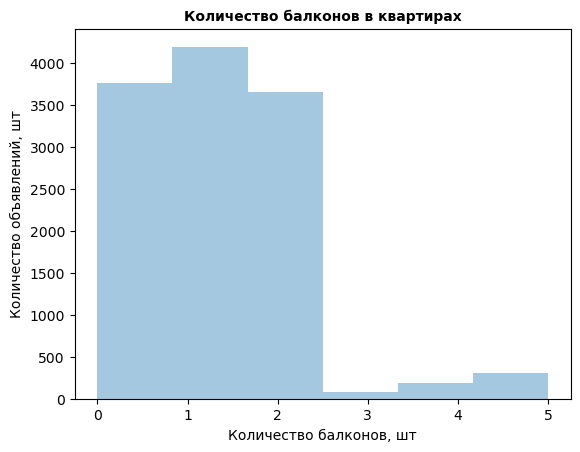

In [43]:
plt.title("Количество балконов в квартирах", fontweight='bold', size='medium')
plt.ylabel("Количество объявлений, шт")
sns.distplot(a=data['balcony'], bins=6, kde=False, rug=False, axlabel="Количество балконов, шт")

Позже форматируем количество балконов и разерёмся с пропусками. 

Столбец "locality_name"

Данные специфические, с пропусками. 

Определяем количество уникальных названий населённых пунктов...

In [44]:
len(data['locality_name'].unique())

365

Собственно, сами населённые пункты:

In [45]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Найдем количество пропусков..

In [46]:
data.query('locality_name.isnull()')['total_images'].count()

49

Обработкой этих данных заёмемся позже...

Столбец "airports_nearest"

Проверим пропущенные значения..

In [47]:
data.query('airports_nearest.isnull()')['total_images'].count()

5542

In [48]:
data.query('airports_nearest.isnull()').groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: total_images, dtype: int64

Все населённые пункты, упомянутые в десятке, не имеют собственного аэропорта. Аэропортов в радиусе 3 км. нет.

Столбец "cityCenters_nearest"

Проверим пропущенные значения..

In [49]:
data.query('cityCenters_nearest.isnull()')['total_images'].count()

5519

In [50]:
data.query('cityCenters_nearest.isnull()').groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: total_images, dtype: int64

Где-то это уже было )

Столбец "parks_around3000"

Проверим пропущенные значения..

In [51]:
data.query('parks_around3000.isnull()')['total_images'].count()

5518

In [52]:
data.query('parks_around3000.isnull()').groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: total_images, dtype: int64

Всё тоже самое, что и в предыдущем столбце.. Парков в радиусе 3 км нет. Хотя в этом и нет смысла - все эти населённые пункты расположенны очень близко к природным лесным массивам.

Столбец "ponds_around3000"

Проверим пропущенные значения..

In [53]:
data.query('ponds_around3000.isnull()')['total_images'].count()

5518

In [54]:
data.query('ponds_around3000.isnull()').groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: total_images, dtype: int64

Всё тоже самое. С таким же выводом - водоёмов в радиусе 3 км нет. 

Столбец "days_exposition"

Проверим пропущенные значения..

In [55]:
data.query('days_exposition.isnull()')['total_images'].count()

3181

In [56]:
data['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'дней в продаже для квартир в объявлениях'}, xlabel='Дней в продаже', ylabel='Объявлений, шт'>

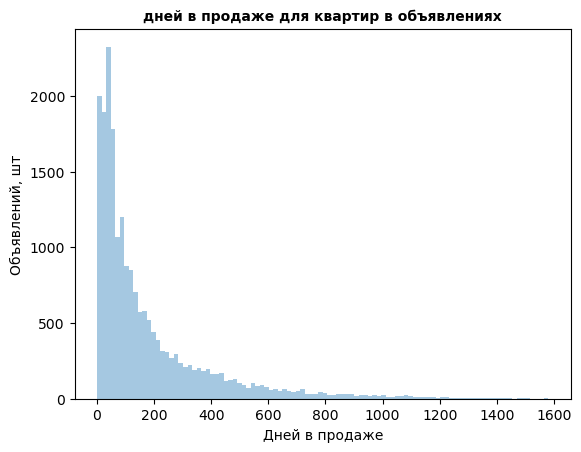

In [57]:
plt.title("дней в продаже для квартир в объявлениях", fontweight='bold', size='medium')
plt.ylabel("Объявлений, шт")
sns.distplot(a=data['days_exposition'], bins=100, kde=False, rug=False, axlabel="Дней в продаже")

Не ясно почему есть пропущенные значения. Возможно, объявления ещё были активны на момент выгрузки данных. Сравним их с квартирами без пропусков..

In [58]:
data.query('days_exposition.isnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,3181.00,3181.00,3181.00,3181.00,2453.00,3172.00,2983.00,3181.00,2978.00,1071.00,2314.00,2315.00,2316.00,1145.00,2316.00,1216.00,0.00
mean,11.45,8317773.22,69.88,2.37,2.82,9.47,40.26,5.28,11.39,1.75,28474.18,13494.39,0.69,489.09,0.83,503.82,NaN
std,5.57,10876178.94,43.31,1.18,1.25,6.09,25.33,4.44,7.08,1.04,12096.80,8908.43,0.83,322.30,0.98,281.72,NaN
min,0.00,430000.00,20.60,0.00,2.00,1.00,8.00,1.00,1.30,1.00,6989.00,181.00,0.00,13.00,0.00,13.00,NaN
25%,7.00,3800000.00,44.00,2.00,2.50,5.00,24.50,2.00,7.20,1.00,18986.00,7310.00,0.00,301.00,0.00,263.00,NaN
50%,11.00,5600000.00,59.60,2.00,2.68,8.00,35.00,4.00,9.45,1.00,26369.50,12445.00,0.00,463.00,1.00,481.50,NaN
75%,16.00,9000000.00,80.00,3.00,2.90,12.00,48.00,7.00,12.80,2.00,36537.50,15900.50,1.00,603.00,1.00,723.75,NaN
max,20.00,289238400.00,631.20,11.00,32.00,36.00,332.00,30.00,87.20,5.00,84853.00,65952.00,3.00,2880.00,3.00,1271.00,NaN


In [59]:
data.query('days_exposition.notnull()').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20518.00,20518.00,20518.00,20518.00,12051.00,20441.00,18813.00,20518.00,18443.00,11109.00,15843.00,15865.00,15865.00,6934.00,15865.00,7894.00,20518.00
mean,9.61,6266172.52,58.87,2.02,2.76,10.86,33.54,5.99,10.44,1.09,28840.34,14292.97,0.60,491.09,0.76,520.16,180.89
std,5.66,10862982.61,34.08,1.05,1.26,6.65,21.32,4.94,5.68,1.06,12706.70,8559.27,0.80,345.53,0.93,277.05,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,2.00,0.00,0.00,208.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,39.50,1.00,2.52,5.00,18.30,2.00,7.00,0.00,18500.00,9479.00,0.00,287.00,0.00,301.00,45.00
50%,9.00,4500000.00,50.90,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26768.00,13166.00,0.00,451.00,0.00,504.00,95.00
75%,14.00,6500000.00,67.90,3.00,2.80,16.00,41.60,8.00,11.95,2.00,37407.00,16386.00,1.00,613.00,1.00,730.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Сразу бросается в глаза максимальное значение опубликованных фотографий. Помню, ранее, было не ясно почему в графике за столбец "total_images" был пик значений на количестве фотографий в 20 штук, и была выдвинута гипотеза о технических или коммерческих ограничяениях. 
В остальном квартиры без информации о промежутке между публикацией и снятии объявления особо от другой категории квартир не отличаются. Побольше жилой и общей площадью, площадью кухонь, да и ничем больше..

Вывод:

Для нижеперечисленных строк определяем действия с ними в последующей предобработке данных:

- total_images: пропусков нет, аномалий нет, поэтому без изменений.
- last_price: пропусков нет, однако наличие сверхдорого жилья потребует обработки.
- total_area: пропусков нет, однако наличие больших площадей потребует обработки.
- first_day_exposition: пропусков нет, необходимо изменить тип данных.
- rooms: пропусков нет, квартиры со значением комнат как 0 должны быть изменены на 1 (по выполненному анализу жилой площади из выборки в 50 квартир со значением комнат как 0).
- ceiling_height: пропусков нет, аномалии (высота больше 6 метров и меньше 2.4) будут обработаны.
- floors_total: без изменений.
- living_area: заполним пропуски, используя коэффициент total_area_to_living_area.
- floor: без изменений.
- is_apartment: заменим пустые значения на False.
- studio: без изменений.
- open_plan: без изменений.
- kitchen_area: заполним пропуски, используя коэффициент total_area_to_kitchen_area.
- balcony: пропуски заменим на 0, форматируем тип данных.
- locality_name: без изменений.
- airports_nearest: без изменений.
- cityCenters_nearest: без изменений.
- parks_around3000: без изменений.
- parks_nearest: без изменений.
- ponds_around3000: без изменений.
- ponds_nearest: без изменений.
- days_exposition: без изменений.

### Предобработка данных

Предобработка данных, столбец "first_day_exposition".

In [60]:
data['first_day_exposition'].head(5)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [61]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [62]:
data['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Предобработка данных, столбец "rooms". 

Замена в данных по квартирам с 0 комнат на 1..

In [63]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [64]:
data['rooms'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

Проверяем..

In [65]:
data[data['rooms'] == 0].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Замена прошла успешно.

Предобработка данных, столбец "ceiling_height"

In [66]:
median_height = data.query('ceiling_height >= 2.4 and ceiling_height < 6')['ceiling_height'].sort_values().median()
median_height

2.65

In [67]:
data.loc[data['ceiling_height'] > 6, 'ceiling_height'] = median_height
data.loc[data['ceiling_height'] < 2.4, 'ceiling_height'] = median_height
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = median_height

In [68]:
data['ceiling_height'].sort_values().unique()

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15,
       4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.45, 4.

Аномалии устранены.

Предобработка данных, столбец "living_area"

Заполняем пропущенные значения ранее найденным коэффициентом..

In [69]:
total_area_to_living_area

0.5647655216993298

In [70]:
data.loc[data['living_area'].isnull(), 'living_area'] = data['total_area']*total_area_to_living_area

Проверяем..

In [71]:
data[data['living_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Сделано!

Предобработка данных, столбец "kitchen_area"

Заполняем пропущенные значения ранее найденным коэффициентом..

In [72]:
total_area_to_kitchen_area

0.18735473877173864

In [73]:
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data['total_area']*total_area_to_kitchen_area

Проверяем..

In [74]:
data[data['kitchen_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Сделано!

Предобработка данных, столбец "is_apartment"

Пропуски заменяем на False..

In [75]:
data.loc[data['is_apartment'].isnull(), 'is_apartment'] = False

Проверяем..

In [76]:
data['is_apartment'].unique()

array([False, True], dtype=object)

Сделано!

Предобработка данных, столбец "balcony"

Пропуски заменяем на 0..

In [77]:
data.loc[data['balcony'].isnull(), 'balcony'] = 0

Проверяем..

In [78]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Сделано!

Предобработка данных, столбец "locality_name"

Всего уникальных названий:

In [79]:
len(data['locality_name'].unique())

365

Проверяем на дубликаты..

In [80]:
data.duplicated().sum()

0

Дубликатов нет..

In [81]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сокращаем длинные названия, убираем пропуски (с ними невозможна продажа) и применяем фильтры по написанию...

In [82]:
data['locality_name'] = data['locality_name'].astype('category')
def filter_words(text):
    text2 = text
    for word in text.split():
         if word == word.lower():
                text2 = text2.replace(word, "")
                text2 = ' '.join(text2.split())
    return text2
data['locality_name'] = data['locality_name'].apply(filter_words)

Проверяем..

In [83]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Проверяем какое количество населённых пунктов и городов осталось в списке..

In [84]:
len(data['locality_name'].unique())

306

Предобработка по столбцу "locality_name" выполнена!

Переходим к следующему шагу..

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [86]:
data['balcony'] = data['balcony'].astype('int64')

In [87]:
data['last_price'] = data['last_price'].astype('int64')

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем столбец "price_per_m2".

In [88]:
data['price_per_m2'] = data['last_price'] / data['total_area']

In [89]:
data['price_per_m2'].describe()

count     23699.00
mean      99421.66
std       50306.80
min         111.83
25%       76585.47
50%       95000.00
75%      114256.33
max     1907500.00
Name: price_per_m2, dtype: float64

In [90]:
data['price_per_m2'] = np.float64(data['price_per_m2'])

Добавляем столбцы: "день недели", "месяц" и "год" публикации объявления.

In [91]:
data['week_day'] = data['first_day_exposition'].dt.weekday

In [92]:
data['month'] = data['first_day_exposition'].dt.month

In [93]:
data['year'] = data['first_day_exposition'].dt.year

Добавляем столбец с характеристикой этажа квартиры, как "первый", "последний" или "другой"..

In [94]:
def get_floor_details(floor, floors_total): 
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

In [95]:
data['floor_details'] = data.apply(lambda x: get_floor_details(x['floor'], x['floors_total']), axis=1) 

In [96]:
display(data['floor_details'].unique())

array(['другой', 'первый', 'последний'], dtype=object)

Проверяем добавление новых столбцов..

In [97]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,week_day,month,year,floor_details
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.00,89.80,9,False,...,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой


Добавляем столбец: "city_center_km".

Переводим дистанцию расстояния от квартиры до центра из метров в километры..

In [98]:
data['city_center_km'] = data['cityCenters_nearest'] / 1000
data['city_center_km'] = data['city_center_km'].round(0)

In [99]:
data.head(100)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,week_day,month,year,floor_details,city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.65,14.00,89.80,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14,5150000,47.00,2018-08-06,2,2.75,9.00,28.10,9,False,...,751.00,1.00,881.00,34.00,109574.47,0,8,2018,последний,14.00
96,20,8780000,78.30,2018-08-24,3,2.50,15.00,51.00,9,False,...,NaN,1.00,746.00,31.00,112132.82,4,8,2018,другой,16.00
97,15,4898000,146.00,2019-02-12,4,2.65,2.00,77.00,2,False,...,NaN,NaN,NaN,34.00,33547.95,1,2,2019,последний,NaN
98,11,11700000,80.00,2014-12-10,3,2.65,5.00,55.10,3,False,...,666.00,0.00,NaN,831.00,146250.00,2,12,2014,другой,9.00


Как итог блока заданий, в общую таблицу были добавлены следующие новые столбцы:
- "price_per_m2", как стоимость за кв.метр площади;
- "день недели" публикации объявления;
- "месяц" публикации объявления;
- "год" публикации объявления;
- "floor_details", как характеристика этажа;
- "city_center_km", как расстояние от квартиры до центра, в километрах.

### Проведите исследовательский анализ данных

Изучим следующие параметры:

1. Общая площадь:

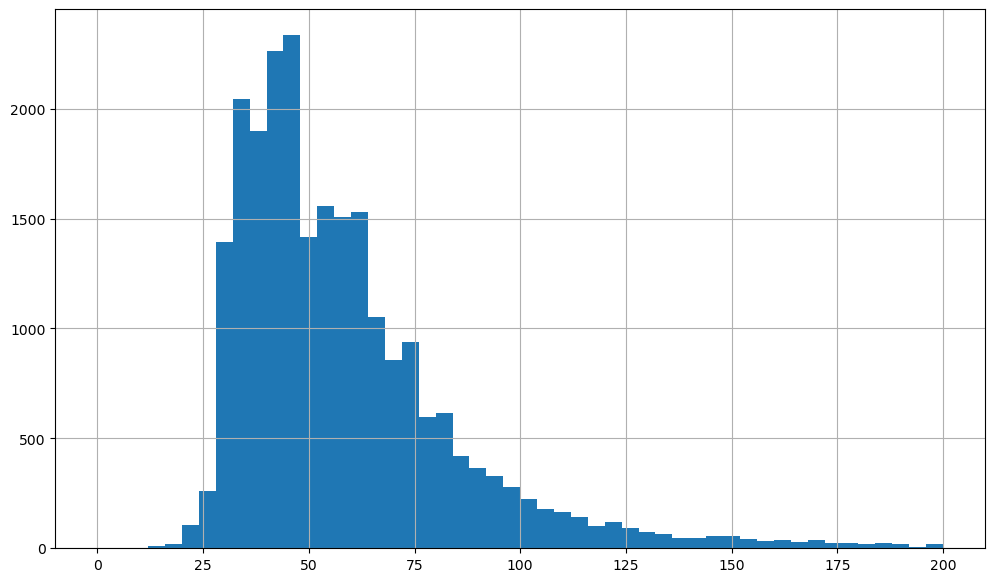

In [100]:
data['total_area'].hist(bins=50, figsize=(12, 7), range=(0,200))
plt.show()

Просмотрим диаграмму размаха:

Верхняя граница:114.75
Нижняя граница:0.00
Медиана:52.00


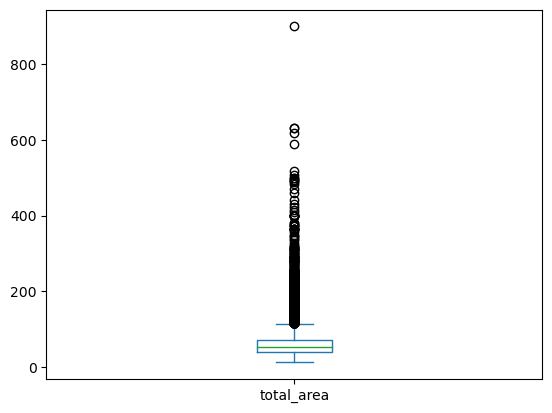

In [101]:
list_of_items=['total_area']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Можем наблюдать ряд вбросов по площади более 114.75 кв.метров. определим процент таких обьявлений:    

In [102]:
def get_observation(data, course='largest'):
    iqr = data.quantile(0.75) - data.quantile(0.25)
    if course == 'largest':     
        return data.quantile(0.75) + 1.5 * iqr
    elif course == 'smallest':
        return data.quantile(0.75) - 1.5 * iqr
    
largest_total_area = get_observation(data['total_area'])

In [103]:
display(f'Процент квартир с площадью > 114.75 кв.метров: {(len(data.query("total_area > @largest_total_area")) / len(data)):.2%}')

'Процент квартир с площадью > 114.75 кв.метров: 5.23%'

Сделаем выборку топ-10 таких квартир:

In [104]:
data[[
    'total_area', 
    'last_price', 
    'ceiling_height', 
    'living_area', 
    'kitchen_area', 
    'rooms'
]].sort_values(by='total_area', ascending=False).head(10)

,total_area,last_price,ceiling_height,living_area,kitchen_area,rooms
19540,900.00,420000000,2.80,409.70,112.00,12
12859,631.20,140000000,3.90,322.30,19.50,7
3117,631.00,140000000,2.65,356.37,60.00,7
15651,618.00,300000000,3.40,258.00,70.00,7
5358,590.00,65000000,3.50,409.00,100.00,15
4237,517.00,50000000,2.65,332.00,22.00,7
8018,507.00,84000000,4.45,301.50,45.50,5
5893,500.00,230000000,2.65,282.38,40.00,6
15016,500.00,150000000,3.20,282.38,93.68,4
12401,495.00,91500000,4.65,347.50,25.00,7


Определим переменную, которая будет разбивать квартиры на группы по площади и визиализируем это через круговую диаграмму..

Используем цветовую гамму отсюда: https://www.webucator.com/article/python-color-constants-module/

In [105]:
colors = ['#CDC0B0', '#458B00', '#1874CD', '#BCEE68', '#76EEC6', '#EEC591', '#98F5FF']

In [106]:
def areas_number(row):
    areas = row['total_area']
    
    if areas <= 30:
        return 'менее 30м2'
    if areas > 30 and areas <=50:
        return '30м2 - 50м2'
    if areas > 50 and areas <=70:
        return '50м2 - 70м2'
    if areas > 70 and areas <=100:
        return '70м2 - 100м2'
    if areas > 100 and areas <=200:
        return '100м2 - 200м2'
    else:
        return '200м2 - 800м2' 

In [107]:
data['areas_number'] = data.apply(areas_number, axis=1)

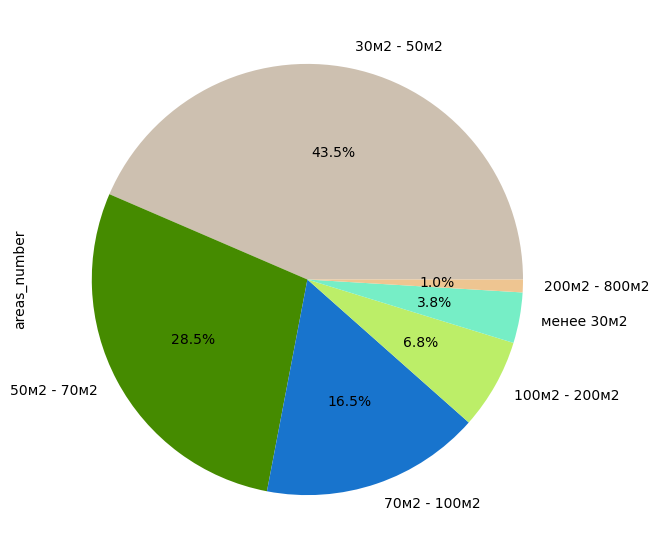

In [108]:
data['areas_number'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), colors=colors)
plt.show()

Как видно из круговой диаграммы, площадь большинства продающихся квартир от 30 до 70 кв. метров (>66% от общего числа). 

2. Жилая площадь:

In [109]:
display(data[['living_area']].describe())

,living_area
count,23699.00
mean,34.56
std,22.33
min,2.00
25%,19.00
50%,30.00
75%,42.10
max,409.70


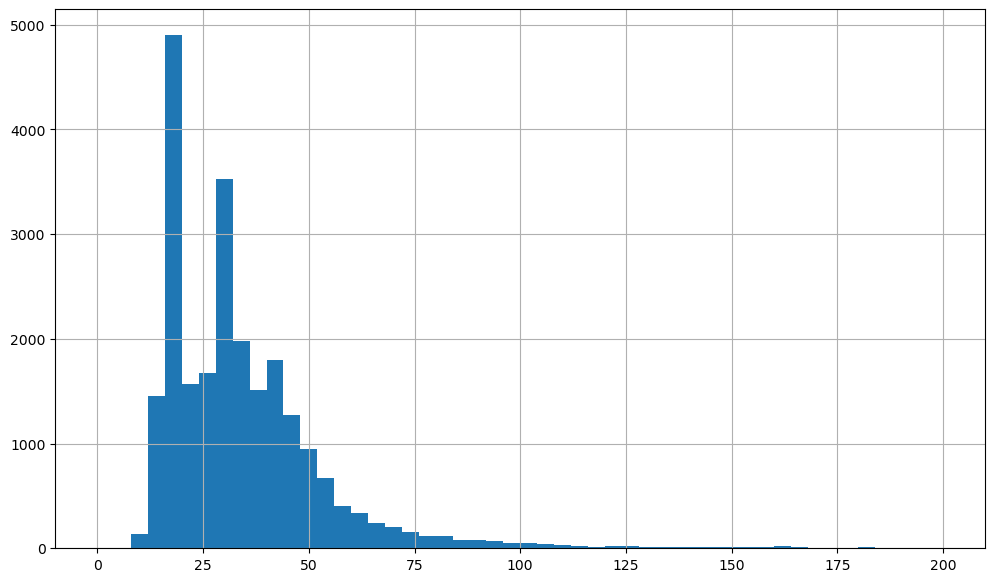

In [110]:
data['living_area'].hist(bins=50, figsize=(12, 7), range=(0,200))
plt.show()

Просмотрим диаграмму размаха:

Верхняя граница:76.75
Нижняя граница:0.00
Медиана:30.00


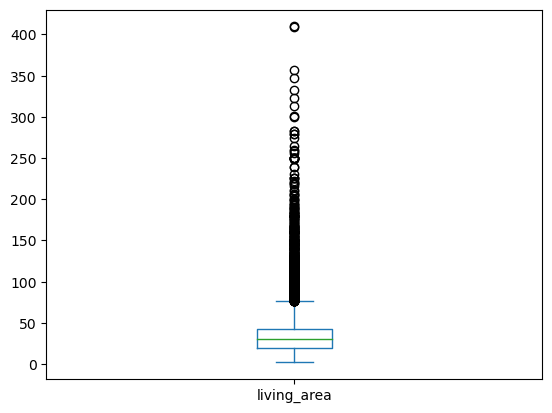

In [111]:
list_of_items=['living_area']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Большинство (>66%) объявлений это квартиры с жилой площадью от 19 до 42 кв. метров.

3. Площадь кухни:

In [112]:
display(data[['kitchen_area']].describe())

,kitchen_area
count,23699.00
mean,10.57
std,6.10
min,1.30
25%,7.00
50%,9.08
75%,12.00
max,112.00


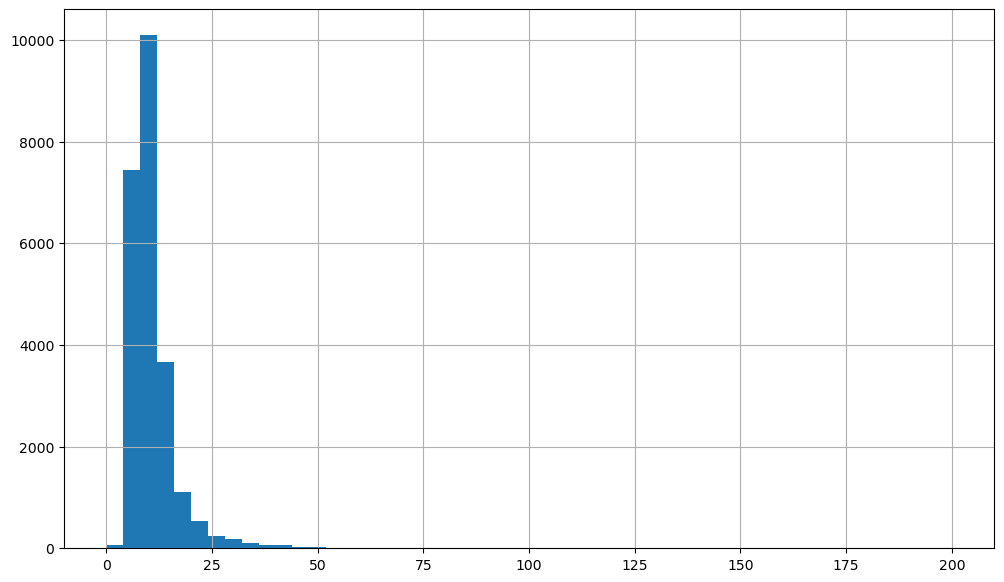

In [113]:
data['kitchen_area'].hist(bins=50, figsize=(12, 7), range=(0,200))
plt.show()

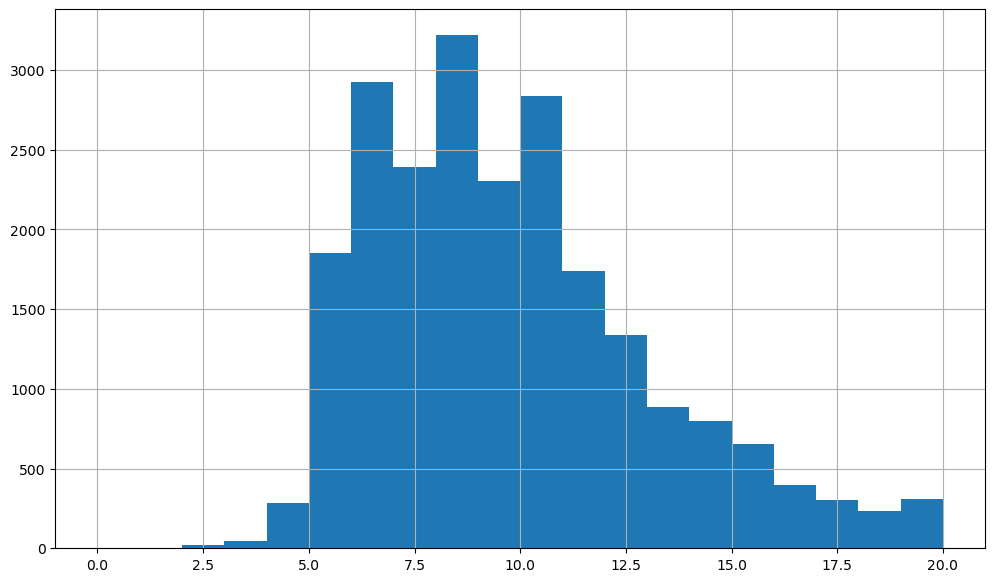

In [114]:
data['kitchen_area'].hist(bins=20, figsize=(12, 7), range=(0,20))
plt.show()

Верхняя граница:19.50
Нижняя граница:0.00
Медиана:9.08


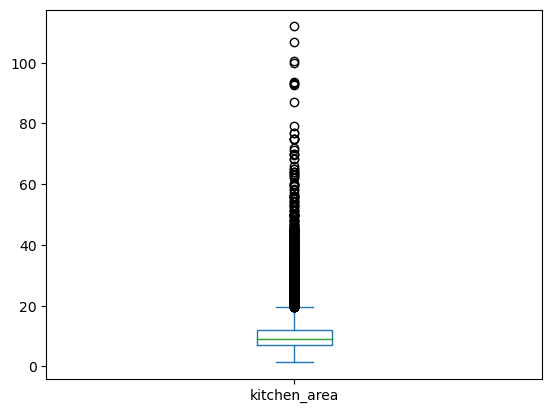

In [115]:
list_of_items=['kitchen_area']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Большинство (>66%) объявлений это квартиры с площадью кухни от 5,5 до 13 кв. метров.

4. Цена объекта:

Преобразуем стоимость в рублях в стоимость в миллионы рублей, сохраняем в новую переменную:

In [116]:
data['last_price_mil'] = data['last_price'] / 1000000

In [117]:
data['last_price_mil'].describe().round(2)

count   23699.00
mean        6.54
std        10.89
min         0.01
25%         3.40
50%         4.65
75%         6.80
max       763.00
Name: last_price_mil, dtype: float64

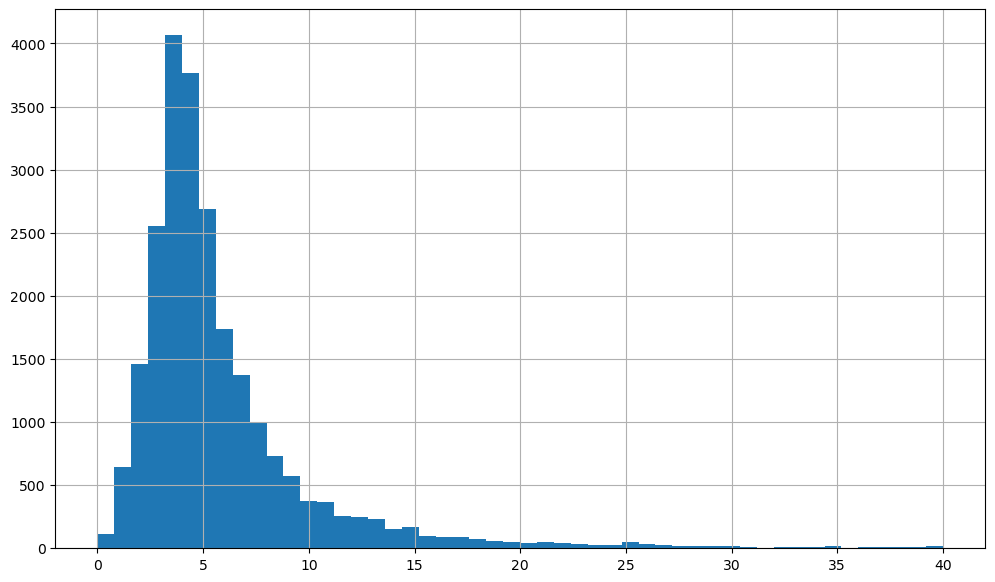

In [118]:
data['last_price_mil'].hist(bins=50, range = (0, 40), figsize = (12, 7))
plt.show()

Верхняя граница:11.90
Нижняя граница:0.00
Медиана:4.65


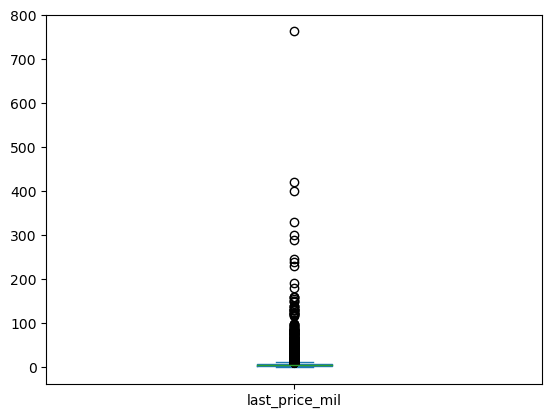

In [119]:
list_of_items=['last_price_mil']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Большинство объектов недвижимости в объявлениях имеют цену от 0 до 11 млн 900 тысяч рублей. 

5. Количество комнат:

In [120]:
data['rooms'].value_counts()

1     8244
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

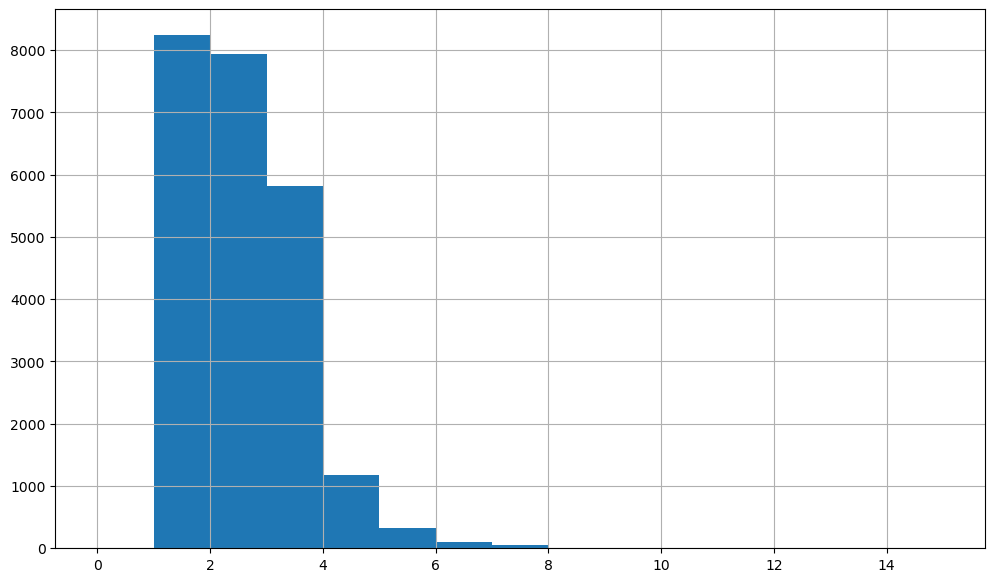

In [121]:
data['rooms'].hist(bins=15, range = (0, 15), figsize = (12, 7))
plt.show()

Верхняя граница:6.00
Нижняя граница:0.00
Медиана:2.00


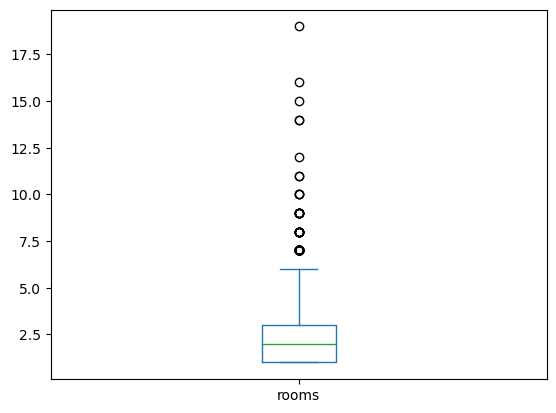

In [122]:
list_of_items=['rooms']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Определим переменную, которая будет разбивать квартиры на группы по площади и визиализируем это через круговую диаграмму..

In [123]:
def rooms_number(row):
    rooms = row['rooms']
    
    if rooms == 1:
        return '1 комната'
    if rooms == 2:
        return '2 комнаты'
    if rooms == 3:
        return '3 комнаты'
    if rooms == 4:
        return '4 комнаты'
    if rooms == 5:
        return '5 комнат'
    else:
        return '6 и более комнат' 

In [124]:
colors = ['#CDC0B0', '#458B00', '#1874CD', '#BCEE68', '#76EEC6', '#EEC591', '#98F5FF']

In [125]:
data['rooms_number'] = data.apply(rooms_number, axis=1)

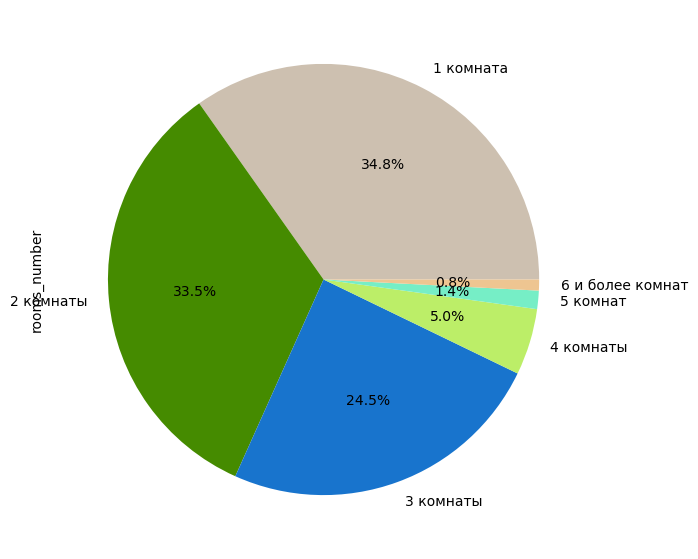

In [126]:
data['rooms_number'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), colors=colors)
plt.show()

Большинство (>66%) объявлений это квартиры с одной и двумя комнатами.

6. Высота потолков:

In [127]:
data['ceiling_height'].value_counts()

2.65    9921
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
4.15       1
3.43       1
4.30       1
3.39       1
3.59       1
Name: ceiling_height, Length: 162, dtype: int64

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

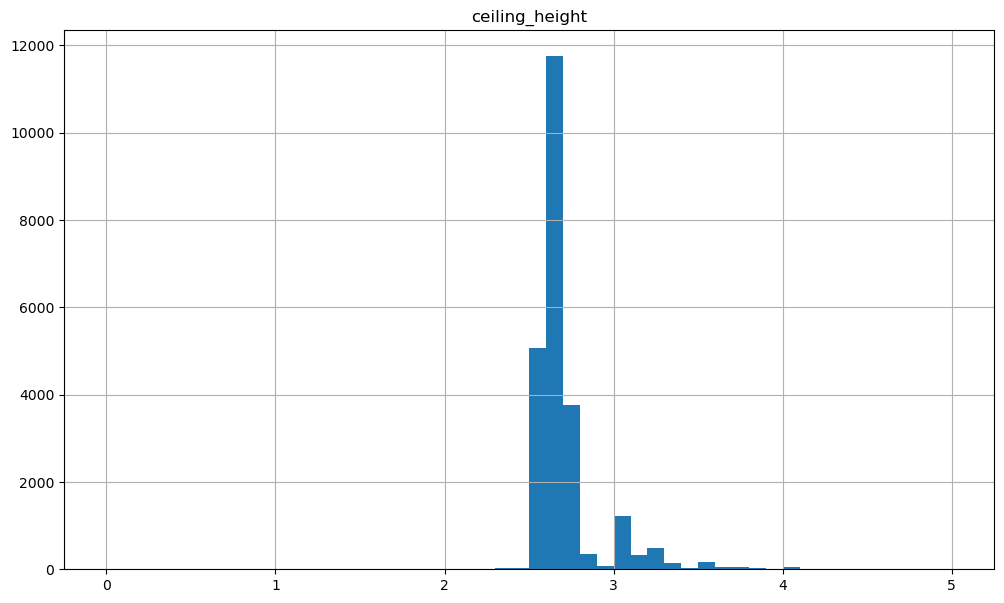

In [128]:
data[['ceiling_height']].hist(bins=50, range = (0, 5), figsize = (12, 7))

Верхняя граница:2.85
Нижняя граница:2.45
Медиана:2.65


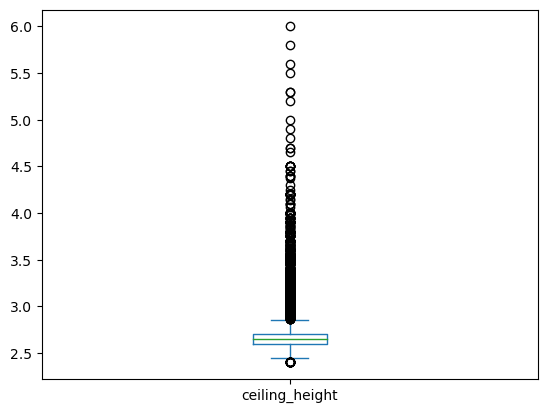

In [129]:
list_of_items=['ceiling_height']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

С потолками предельно просто, 2.65 метров, как медианное значение отлично это показывает..

Сделаем расчёт по долевому соотношению квартир высотой более 2,85 метров..

In [130]:
largest_ceiling = 2.85
len(data.query('ceiling_height > @largest_ceiling')) / len(data)

0.1216928984345331

12% - достаточная величина, чтобы с ней считаться..

7. Этаж квартиры:

In [131]:
data['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

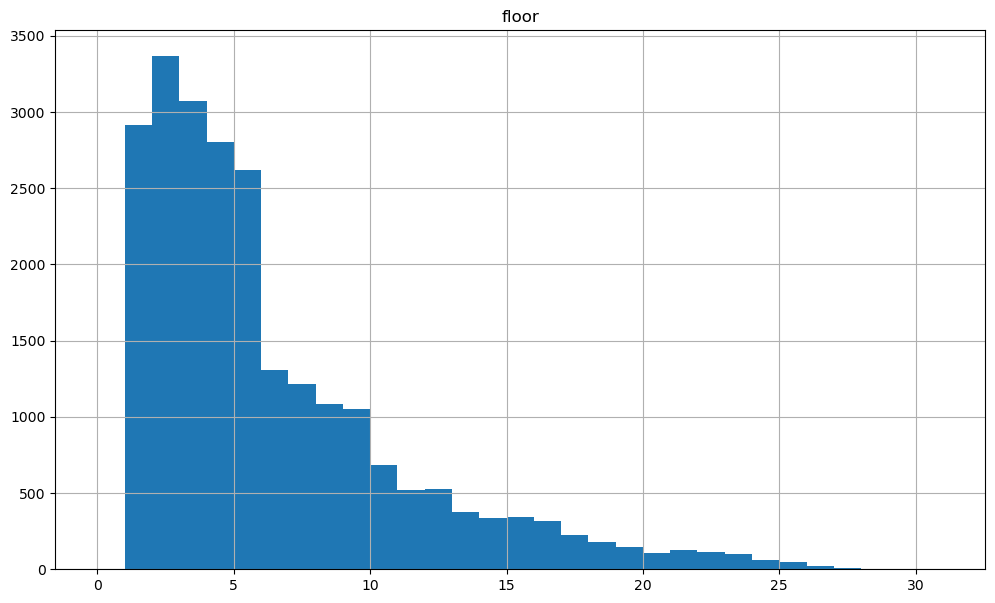

In [132]:
data[['floor']].hist(bins=31, range = (0, 31), figsize = (12, 7))

Верхняя граница:17.00
Нижняя граница:0.00
Медиана:4.00


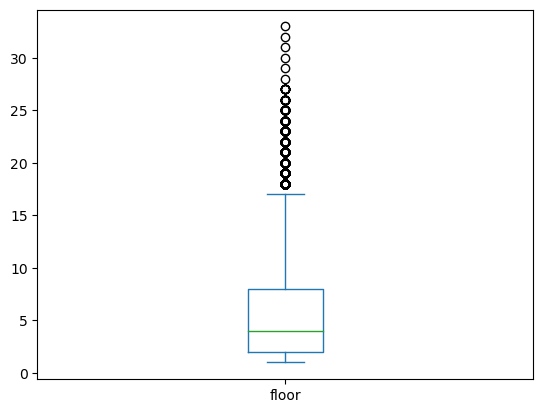

In [133]:
list_of_items=['floor']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Сделаем расчёт по долевому соотношению продаваемых квартир на этажах выше 17..

In [207]:
largest_floor = 17
len(data.query("floor.astype('int') > @largest_floor")) / len(data)

0.03890459513059623

Почти 4%. 

Самый популярный этаж для продаваемых квартир это второй. Возможно, большая часть зданий, в которых продаются квартиры, до сих пор ещё двух и трёхэтажные. Это мы проясним чуть позже, далее. 
Первые этажи самые шумные и грязные, а в последние, под крышей, где ветер гуляет и очень уж шумно барабанит дождь, и которые переодически начинают течь, люди тоже не очень любят вселяться. 
И всего менее 4% квартир выше 17 этажа, в которых, если лифт откажет, совсем грустно будет..

8. Тип этажа квартиры ("первый","другой","последний)":

In [135]:
data['floor_details'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_details, dtype: int64

Определим переменную, которая будет разбивать квартиры на группы по категории этажности и визиализируем это через круговую диаграмму..

In [136]:
def floor_datails(row):
    cat = row['floor_details']
    
    if cat == "первый":
        return 'первый'
    if rooms == "другой":
        return 'другой'
    else:
        return 'последний' 

In [137]:
colors = ['#CDC0B0', '#458B00', '#1874CD']

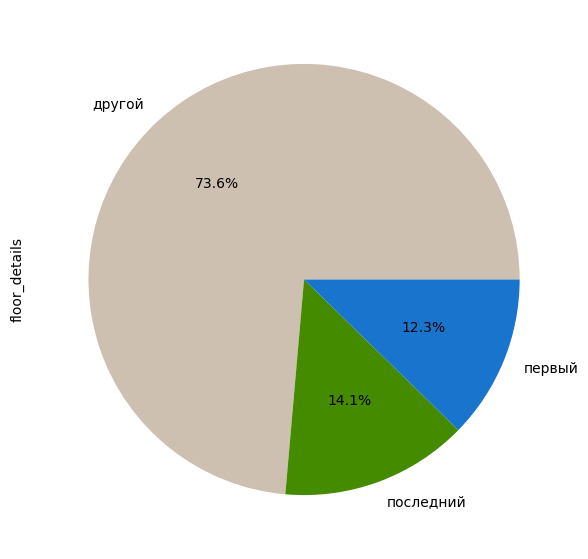

In [138]:
data['floor_details'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), colors=colors)
plt.show()

Как можно заметить по курговой диаграмме, большинство (73,6%) продаваемых квартир это не первый и не последний этаж. Квартиры на первом этаже составлет 12,3%, а квартиры на последнем этаже 14,1%. 

9. Общее количество этажей в доме:

Как раз повод проверить высказанное двумя абзацами про этажи, вероятностное (гипотеза) утверждение..

In [139]:
data = data.astype({"floors_total": "Int64"})

In [140]:
data['floors_total'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   33,   34,   35,   36,   37,   52,   60, <NA>]
Length: 37, dtype: Int64

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

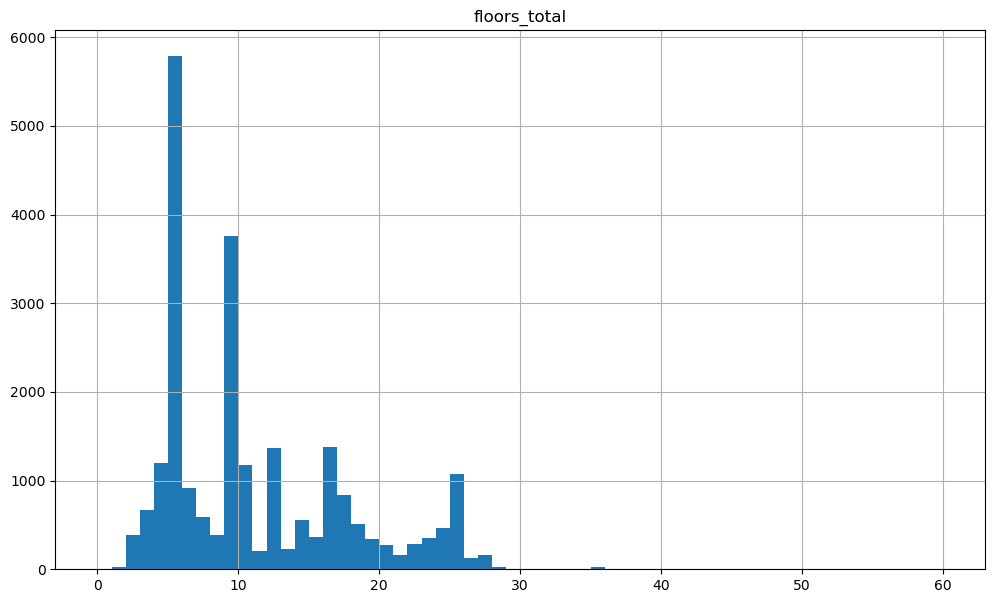

In [141]:
data[['floors_total']].hist(bins=60, range = (0, 60), figsize = (12, 7))

Собственно, самый высокий пик на 5 этажных зданиях, потом 9-ти этажки, и ещё пики на 12, 14, 16 и 27 этажных зданиях. Зданий старого фонда заметно больше.

10. Расстояние до центра города (в метрах):

Верхняя граница:26875.50
Нижняя граница:0.00
Медиана:13098.50


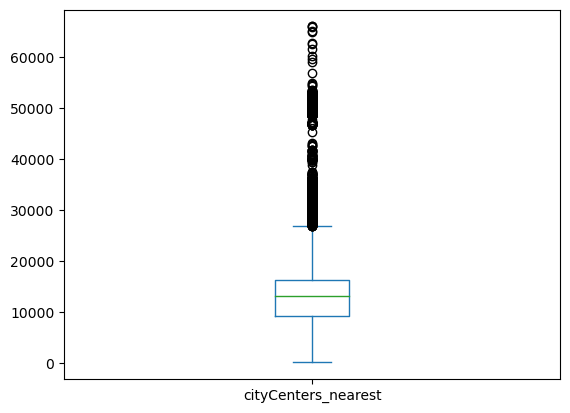

In [142]:
list_of_items=['cityCenters_nearest']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

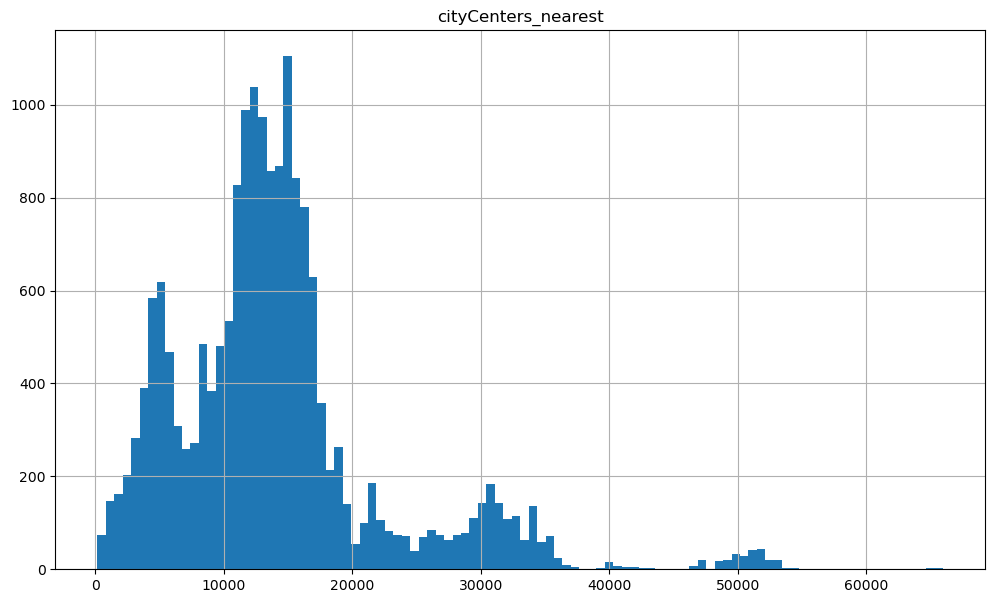

In [143]:
data[['cityCenters_nearest']].hist(bins=100, figsize = (12, 7))

In [144]:
hi_dist = 26875.50
len(data.query('cityCenters_nearest > @hi_dist')) / len(data)

0.07287227309169163

Есть два основных массива объявлений по квартирам, первый практически рядом с центром (до 6 километров), второй с расстоянием до центра от 10 до 18 километров. Отдельные пики вероятнее всего жильё в пригороде. Квартиры с удалением от центра на расстоянии более 26,87 километров составляют 7,2% от всех объявлений. Вероятно, это районные центры или крупные населённые пункты в области. 

11. Расстояние до ближайшего аэропорта (в метрах):

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

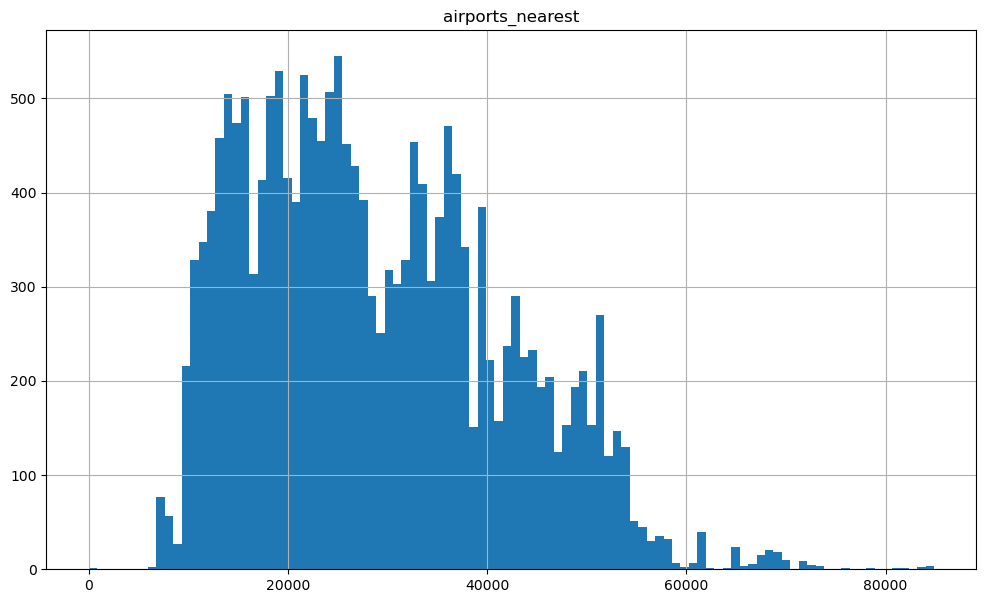

In [145]:
data[['airports_nearest']].hist(bins=100, figsize = (12, 7))

Верхняя граница:65305.00
Нижняя граница:0.00
Медиана:26726.00


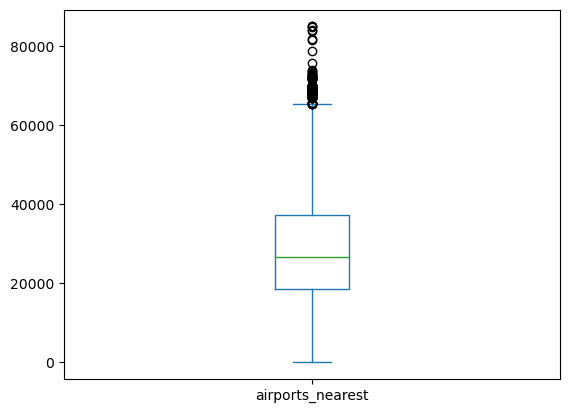

In [146]:
list_of_items=['airports_nearest']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

Для более 95% объявлений расстояние до аэропорта от 6 км до 60 км. но если по медиане, то это 26,7 км. 

12. Расстояние до ближайшего парка (в метрах):

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

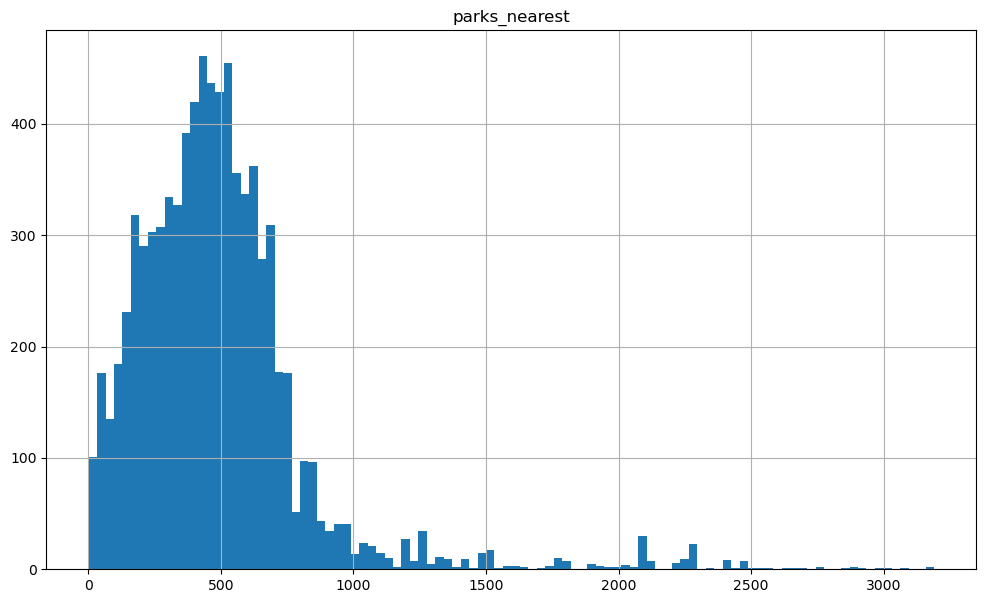

In [147]:
data[['parks_nearest']].hist(bins=100, figsize = (12, 7))

Верхняя граница:1098.00
Нижняя граница:0.00
Медиана:455.00


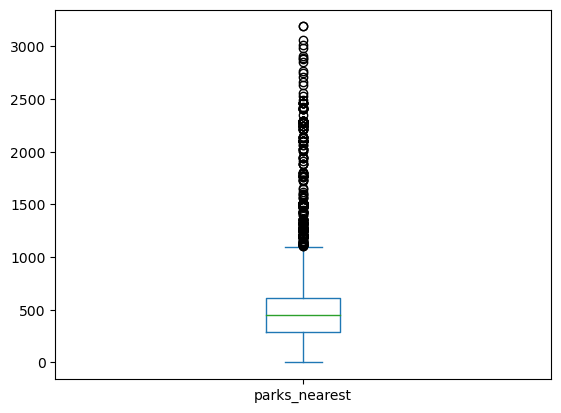

In [148]:
list_of_items=['parks_nearest']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

In [149]:
data.query('parks_around3000.isnull()')['total_images'].count()

5518

In [150]:
data.query('ponds_nearest.isna()==True and ponds_around3000==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_m2,week_day,month,year,floor_details,city_center_km,areas_number,last_price_mil,rooms_number
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.00,82920.79,1,12,2018,первый,19.00,30м2 - 50м2,3.35,1 комната
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,155.00,99195.71,3,11,2017,другой,19.00,30м2 - 50м2,3.70,1 комната
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.44,22,False,...,NaN,110544.69,3,4,2019,другой,12.00,70м2 - 100м2,7.92,2 комнаты
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.00,88524.59,6,2,2017,другой,15.00,50м2 - 70м2,5.40,3 комнаты
11,9,3300000,44.00,2018-08-27,2,2.65,5,31.00,4,False,...,7.00,75000.00,0,8,2018,другой,52.00,30м2 - 50м2,3.30,2 комнаты
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02,4,3.00,26,71.40,17,False,...,NaN,147586.21,4,11,2018,другой,11.00,100м2 - 200м2,21.40,4 комнаты
23685,15,2490000,31.00,2019-01-24,1,2.50,5,17.30,5,False,...,NaN,80322.58,3,1,2019,последний,52.00,30м2 - 50м2,2.49,1 комната
23687,6,3200000,39.00,2017-12-16,1,2.65,9,20.00,6,False,...,38.00,82051.28,5,12,2017,другой,17.00,30м2 - 50м2,3.20,1 комната
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.00,12,False,...,23.00,91089.11,0,4,2019,другой,14.00,100м2 - 200м2,9.20,3 комнаты


Теперь стало ясно, что ближе 3 км парков нет и расстояние до них не посчитать. 

13. День и месяц публикации объявления:

array([[<AxesSubplot:title={'center':'week_day'}>]], dtype=object)

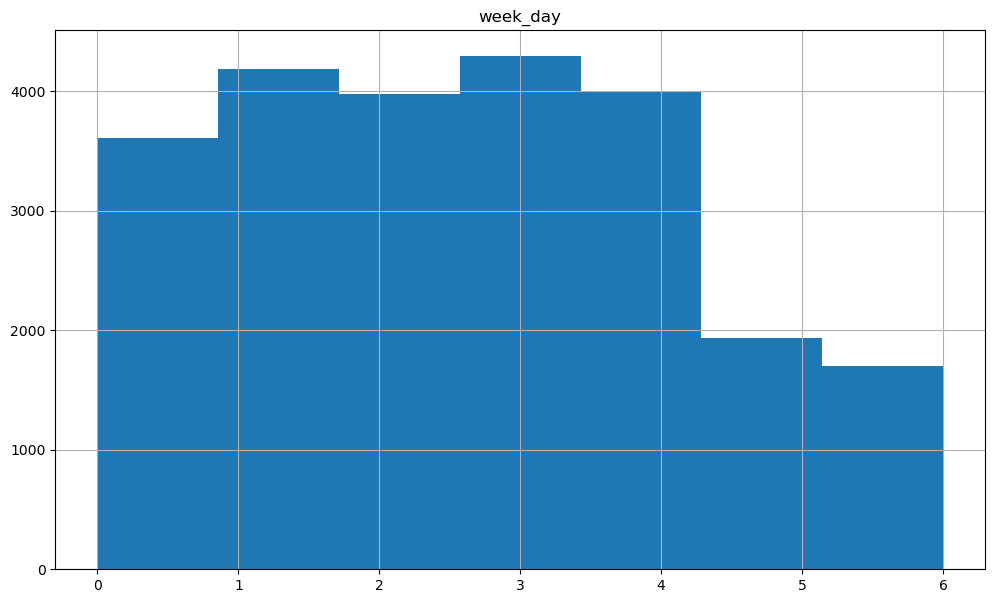

In [151]:
data[['week_day']].hist(bins=7, figsize = (12, 7))

Ожидаемо, что в рабочии дни объявлений больше всего, в выходные агенста недвижимости, размещающие объявления, за редким исключением не работают. Ну а понедельник, традиционно трудный день для всех.

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

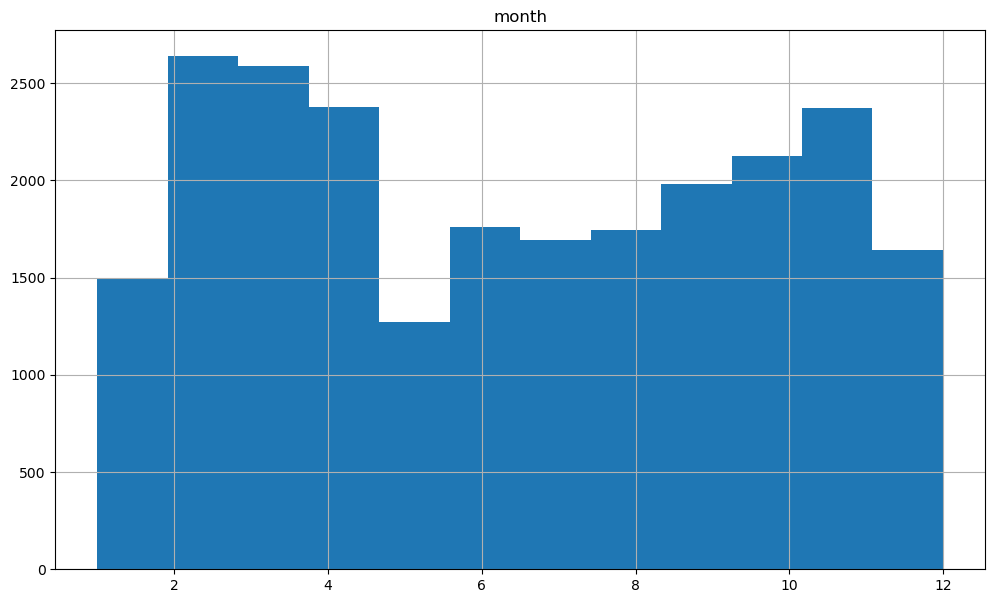

In [152]:
data[['month']].hist(bins=12, figsize = (12, 7))

По гистаграмме видно, что к концу зимы активность выставления объявлений возрастает и в целом снижается к началу лета, а потом вновь набирает свою силу к началу зимы. Почему так происходит, могу только предполагать. Может люди начинают просыпаться из спячки, чтобы похвастаться первыми ландышами в каком-нибудь инстаграмме ) но вижу, что советы искать жильё осенью имеют под собой определённый смысл. Падает ли цена в этот период, надеюсь узнаю дальше..

Изучем, как быстро продавались квартиры..

In [153]:
data['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Продолжительность действия объявления')

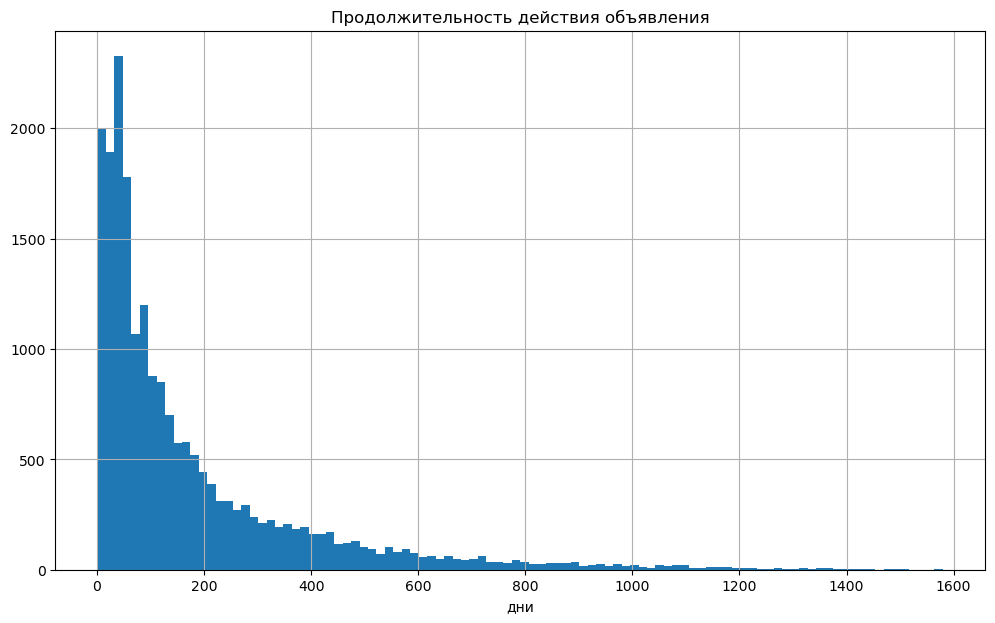

In [154]:
x = data['days_exposition'].hist(bins=100, figsize = (12, 7))
x.set_xlabel('дни')
x.set_title('Продолжительность действия объявления', fontsize = 12)

<AxesSubplot:>

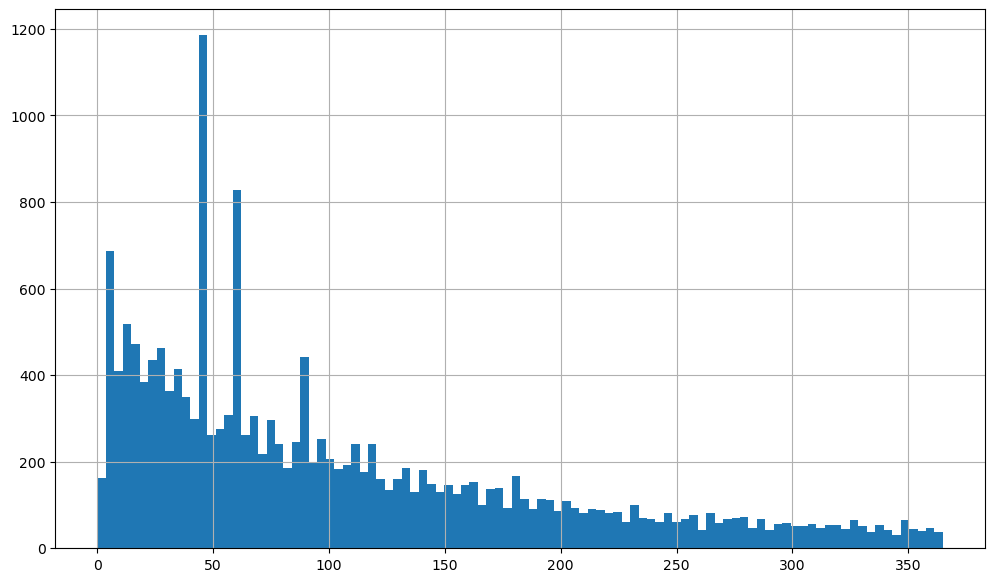

In [155]:
data['days_exposition'].hist(bins=100, range=(0,365),figsize = (12, 7))

Определим количество объявлений с продолжительностью больше одного года..

In [156]:
data.query('days_exposition > 365')['days_exposition'].count()

3061

Верхняя граница:512.50
Нижняя граница:0.00
Медиана:95.00


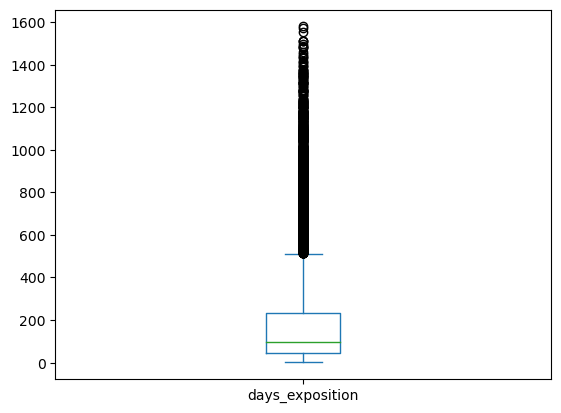

In [157]:
list_of_items=['days_exposition']
for i in list_of_items:
    q1,q3=np.nanpercentile(data[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=data[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))    
    data[i].plot(kind='box')
    plt.show()

<AxesSubplot:>

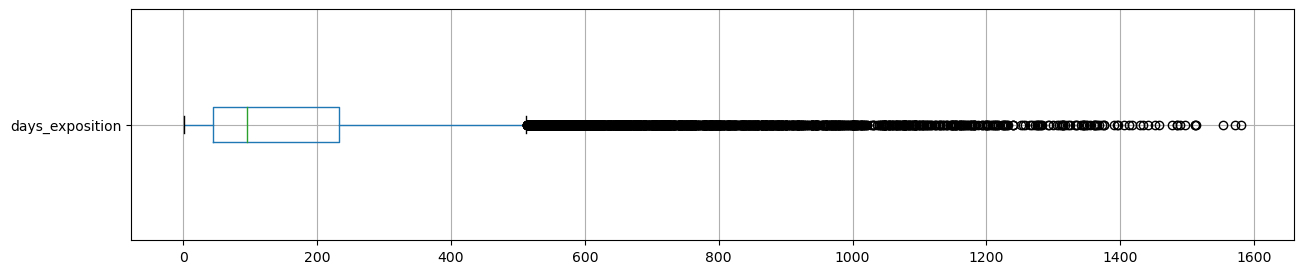

In [158]:
data.boxplot('days_exposition', vert = False, figsize=(15,3))

медианное значение - 95 дней..

Вычислим среднее значение..

In [159]:
display(data['days_exposition'].mean())

180.88863436982163

Определим, что такое свехдолгая и сверхбыстрая продажа..

In [160]:
largest_exposition = get_observation(data['days_exposition'])

In [161]:
smallest_exposition = data['days_exposition'].quantile(0.1)

In [162]:
display(f'Свехбыстрая продажа это: {smallest_exposition:.0f} дней.')
display(f'Сверхдолгая продажа это: {largest_exposition:.0f} дней.')

'Свехбыстрая продажа это: 17 дней.'

'Сверхдолгая продажа это: 512 дней.'

Вывод:
1) Большая часть объявлений закрывается в ближайшие 6 месяцев. 
2) Из них значительная часть квартир продаётся в ближайшие 3 месяца.
3) Есть объявления со сроком публикации более пяти лет, возможно о них просто забыли после сделки купли-продажи.
4) Сверхбыстрая продажа - сделки со сроком публикации до 17 дней, сверхдолгие продажи - более 512 дней ("верхний ус"). 

Определим теперь влияние факторов на общую (полную) стоимость объекта.

Нас интересуют слудующие факторы:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- категория этажа квартиры ("первый","последний","другой");
- даты размещения ("день недели","месяц","год").

In [163]:
data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_details', 'week_day', 'month', 'year']].corr()

,total_area,living_area,kitchen_area,rooms,week_day,month,year
total_area,1.00,0.95,0.66,0.76,-0.00,0.00,-0.08
living_area,0.95,1.00,0.51,0.83,-0.00,-0.00,-0.07
kitchen_area,0.66,0.51,1.00,0.32,-0.00,0.00,-0.06
rooms,0.76,0.83,0.32,1.00,-0.00,-0.00,-0.06
week_day,-0.00,-0.00,-0.00,-0.00,1.00,0.01,-0.00
month,0.00,-0.00,0.00,-0.00,0.01,1.00,-0.27
year,-0.08,-0.07,-0.06,-0.06,-0.00,-0.27,1.00


1. Зависимость цены объекта от общей площади:

Text(0.5, 1.0, 'Зависимость цены объекта от общей площади')

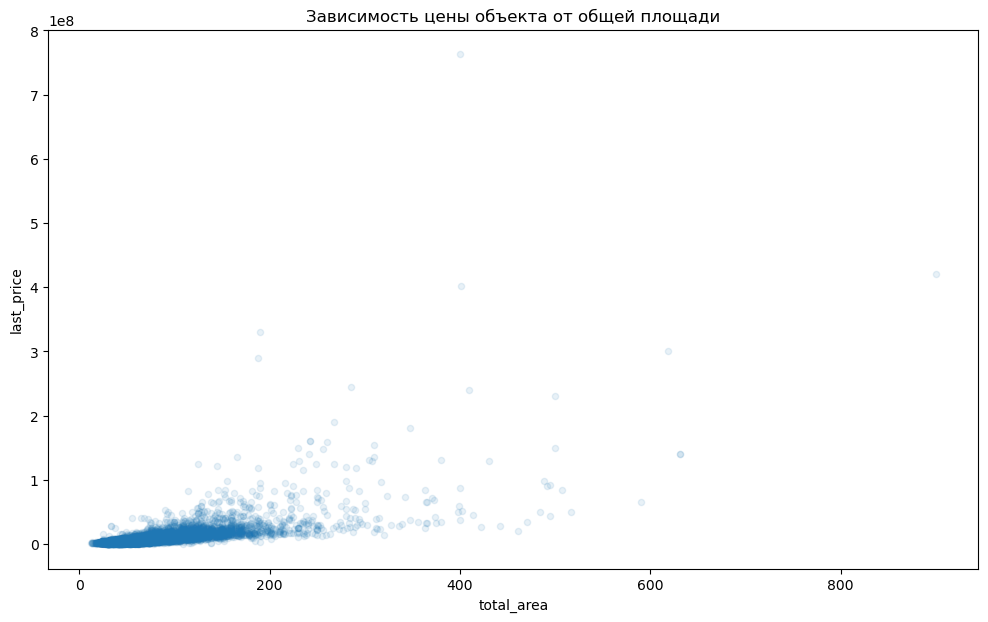

In [164]:
ax = data.plot(x='total_area', y='last_price', kind='scatter', figsize = (12, 7), alpha=0.1)
ax.set_title('Зависимость цены объекта от общей площади')

Можно заметить, что для большинста объектов работает правило: большая площадь => большая цена. Есть, конечно, какие-то особые объекты, вероятно не стандартные и откровенно дизайнерские, с индивидуальным подходом и огоньком. 

2. Зависимость цены объекта от жилой площади:

Text(0.5, 1.0, 'Зависимость цены объекта от общей площади')

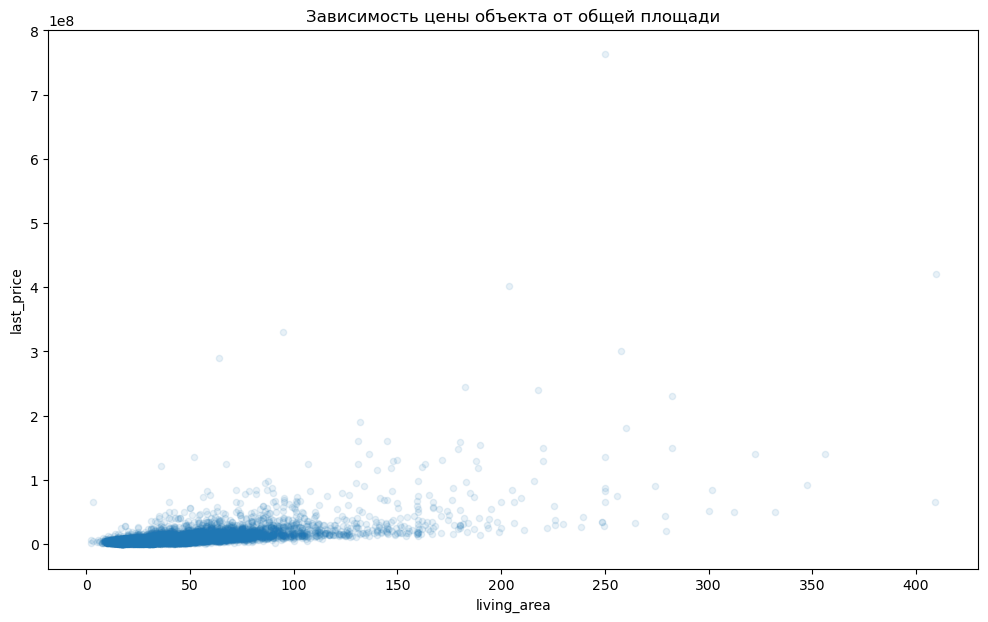

In [165]:
ax = data.plot(x='living_area', y='last_price', kind='scatter', figsize = (12, 7), alpha=0.1)
ax.set_title('Зависимость цены объекта от общей площади')

Работает тоже самое правило.. 

3. Зависимость цены объекта от площади кухни:

Text(0.5, 1.0, 'Зависимость цены объекта от площади кухни')

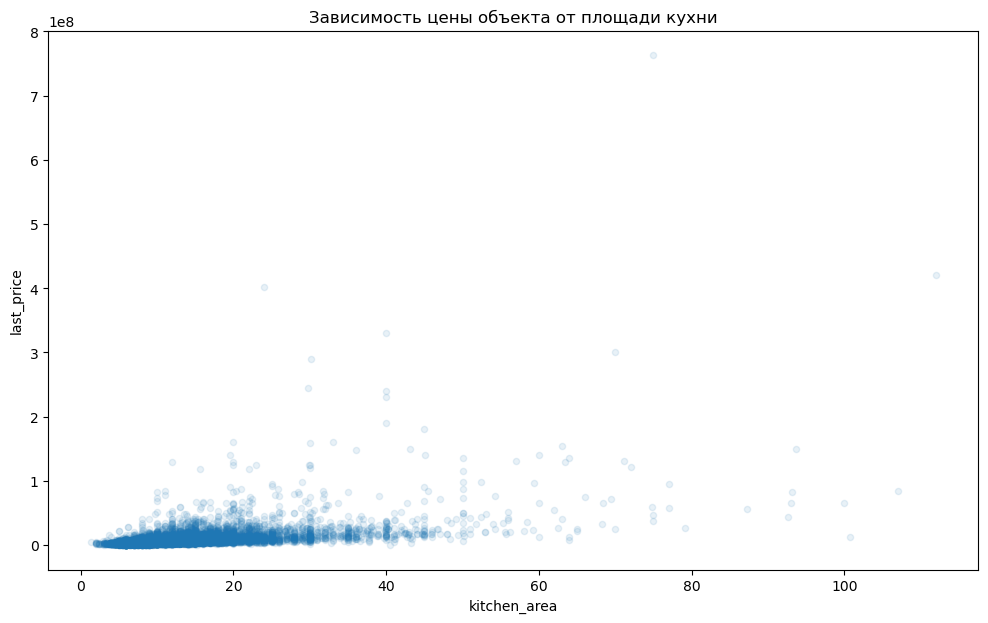

In [166]:
ax = data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize = (12, 7), alpha=0.1)
ax.set_title('Зависимость цены объекта от площади кухни')

Обозначенное выше гипотетическое правило раобает как для общей площади, как для жилой площади, так и для площади кухни. Чем больше, тем дороже объект. Да и как иначе?

4. Зависимость цены объекта от количества комнат:

Выведем гистограмму средних значений..

<AxesSubplot:xlabel='rooms'>

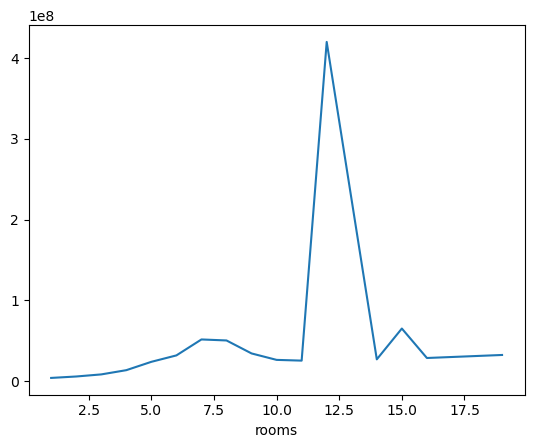

In [167]:
data.groupby('rooms')['last_price'].mean().plot()

Для количества комнат от 1 до 7 практически линейная зависимость к ценаобразованию. Пик на 12 и 16 комнатах мне не ясен, но возможно экакое-нибудь элитное жильё.

5. Зависимость цены объекта от категории этажа квартиры ("первый","последний","другой"):

Построим столбчатую диаграмму..

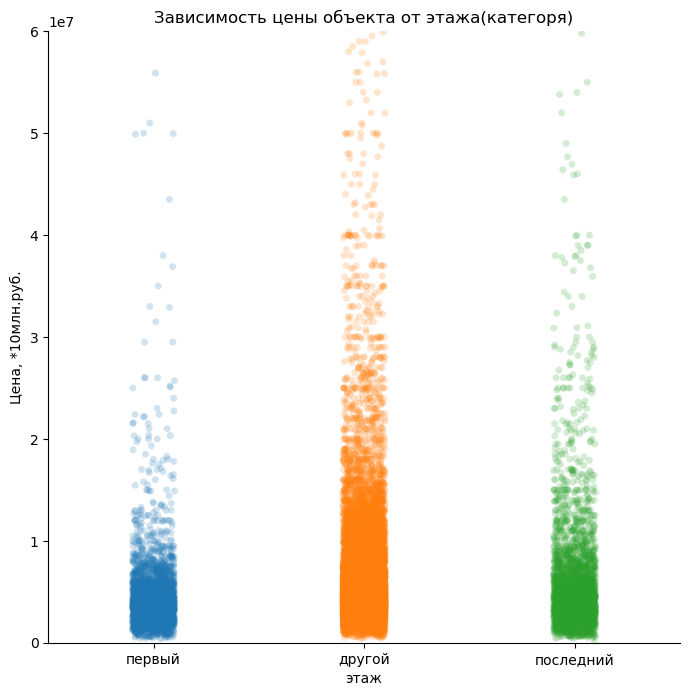

In [168]:
categories=['первый', 'другой', 'последний']
g=sns.catplot(x='floor_details', y='last_price', data=data, alpha=0.2, order=categories, height=7)
g.set_axis_labels("этаж", "Цена, *10млн.руб.").set(ylim=(0, 60000000))
g.set(title='Зависимость цены объекта от этажа(категоря)')

Самые дешёвые объекты недвижимости на первом этаже, более дорогие на последнем этаже. Ну а то, что посредине, дороже всего. 

6. Зависимость цены объекта от даты размещения:

<AxesSubplot:xlabel='week_day'>

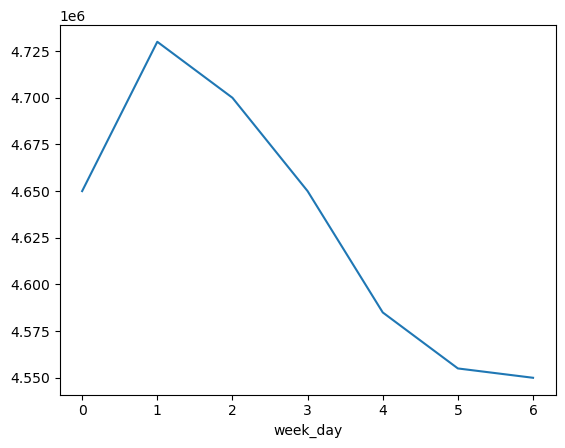

In [169]:
data.groupby('week_day')['last_price'].median().plot()

Почему-то цена объявлений падает от вторника к понедельнику. Но в понедельник самая высокая. 

<AxesSubplot:xlabel='month'>

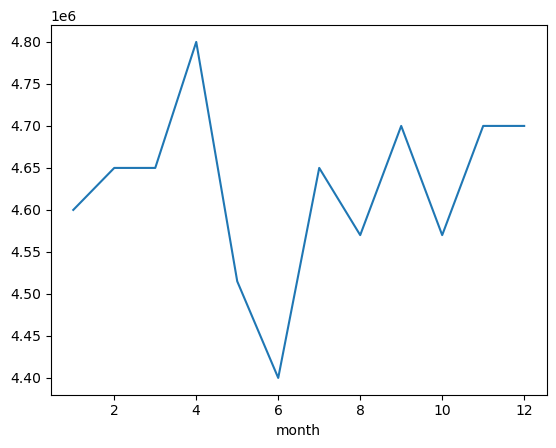

In [170]:
data.groupby('month')['last_price'].median().plot()

Почему так не стабильно? Самая высокая цена в апреле и далее пики цены в июле, сентябре и ноябре. А самая низкая цена в июне. Значит именно в июне нужно начинать себе искать что-то после успешного окончания курсов Yandex Practikum и трудоустройства. Лет так через..эх.

<AxesSubplot:xlabel='year'>

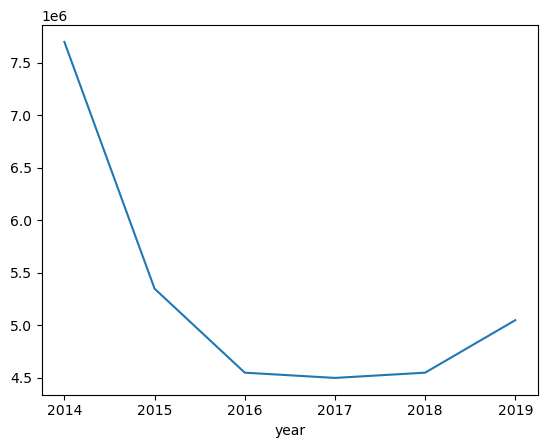

In [171]:
data.groupby('year')['last_price'].median().plot()

Пик цены был в 2014 году, который за год (с 2014 по 2015) резко снизился примерно на 30%. И до 2019 года медианное значение цены остается на уровне 2015 года.

Средняя цена 1 кв. метра в 10 населённых пункатх с наибольшим количеством объявлений.

Определяем населённые пункты..

In [172]:
top_ten = data.pivot_table(index='locality_name', values = 'price_per_m2', aggfunc=('count', 'mean'))
top_ten = top_ten.sort_values(by='count', ascending=False).head(10)
top_ten

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.01
Мурино,590,86087.51
Кудрово,472,95324.93
Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,369,103125.82
Колпино,338,75424.58
Парголово,327,90175.91
Гатчина,307,68746.15


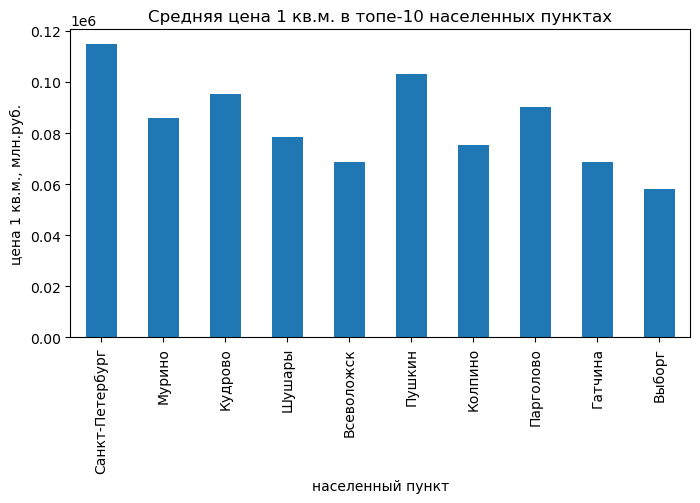

In [173]:
ax = top_ten['mean'].plot(x='locality_name', y ='mean', kind='bar', figsize=(8,4))
ax.set(xlabel='населенный пункт', ylabel='цена 1 кв.м., млн.руб.', title='Средняя цена 1 кв.м. в топе-10 населенных пунктах')
ax.ticklabel_format(axis='y', scilimits=(6,6))

Самая высокая стоимость объектов недвижимости (из 10 выбранных населенных пунктов) находится в Санкт-Петербурге - в среднем 117 тысяч рублей за 1 кв. метр. Самая низкая цена за квадратный метр в Выборге - в среднем 60 тысяч рублей за 1 кв. метр.

Теперь выделим по три населённых пункта с самой высокой стоимостью объектов недвижимости и с самой низкой

In [174]:
a = data.groupby('locality_name')['price_per_m2'].mean().sort_values(ascending=False).head(3)

In [175]:
b = data.groupby('locality_name')['price_per_m2'].mean().sort_values(ascending=False).tail(3)

<AxesSubplot:title={'center':'Топ-3 н.п. по наибольшей и наименьшей цене за кв.метр'}, xlabel='locality_name', ylabel='price_per_m2'>

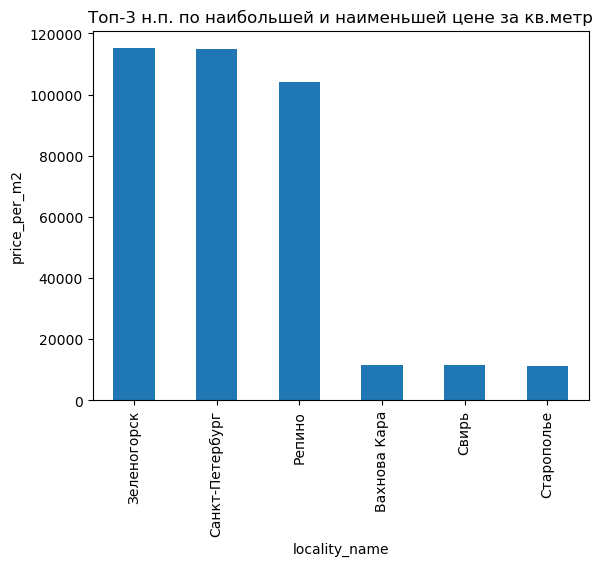

In [176]:
c = pd.concat((a, b), axis=0)
c.plot(kind='bar', title='Топ-3 н.п. по наибольшей и наименьшей цене за кв.метр', ylabel='price_per_m2')

- Наибольшая цена за квадратный метр в Санкт-Петербурге, Зеленогорске и Репино.
- Наименьшая в Вахнова Каре, Свири и Старополье.

Определим цену каждого километра до центра объектов недвижимости в Санкт-Петербурге:

In [177]:
data.loc[data['locality_name'] == 'Санкт-Петербург']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_m2,week_day,month,year,floor_details,city_center_km,areas_number,last_price_mil,rooms_number
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,120370.37,3,3,2019,другой,16.00,100м2 - 200м2,13.00,3 комнаты
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.00,82920.79,1,12,2018,первый,19.00,30м2 - 50м2,3.35,1 комната
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,558.00,92785.71,3,8,2015,другой,14.00,50м2 - 70м2,5.20,2 комнаты
3,0,64900000,159.00,2015-07-24,3,2.65,14,89.80,9,False,...,424.00,408176.10,4,7,2015,другой,7.00,100м2 - 200м2,64.90,3 комнаты
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.00,100000.00,1,6,2018,другой,8.00,70м2 - 100м2,10.00,2 комнаты


In [178]:
data['city_center_km'].head(10)

0   16.00
1   19.00
2   14.00
3    7.00
4    8.00
5     NaN
6   19.00
7   12.00
8     NaN
9   15.00
Name: city_center_km, dtype: float64

In [179]:
data.pivot_table(index = 'city_center_km', values = 'last_price', aggfunc='mean')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_m2,week_day,month,year,floor_details,city_center_km,areas_number,last_price_mil,rooms_number
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,NaN,120370.37,3,3,2019,другой,16.00,100м2 - 200м2,13.00,3 комнаты
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,81.00,82920.79,1,12,2018,первый,19.00,30м2 - 50м2,3.35,1 комната
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,558.00,92785.71,3,8,2015,другой,14.00,50м2 - 70м2,5.20,2 комнаты
3,0,64900000,159.00,2015-07-24,3,2.65,14,89.80,9,False,...,424.00,408176.10,4,7,2015,другой,7.00,100м2 - 200м2,64.90,3 комнаты
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,121.00,100000.00,1,6,2018,другой,8.00,70м2 - 100м2,10.00,2 комнаты
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,55.00,95065.79,0,9,2018,другой,NaN,30м2 - 50м2,2.89,1 комната
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,155.00,99195.71,3,11,2017,другой,19.00,30м2 - 50м2,3.70,1 комната
7,5,7915000,71.60,2019-04-18,2,2.65,24,40.44,22,False,...,NaN,110544.69,3,4,2019,другой,12.00,70м2 - 100м2,7.92,2 комнаты
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,189.00,87454.76,2,5,2018,другой,NaN,30м2 - 50м2,2.90,1 комната
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,289.00,88524.59,6,2,2017,другой,15.00,50м2 - 70м2,5.40,3 комнаты


<AxesSubplot:xlabel='city_center_km'>

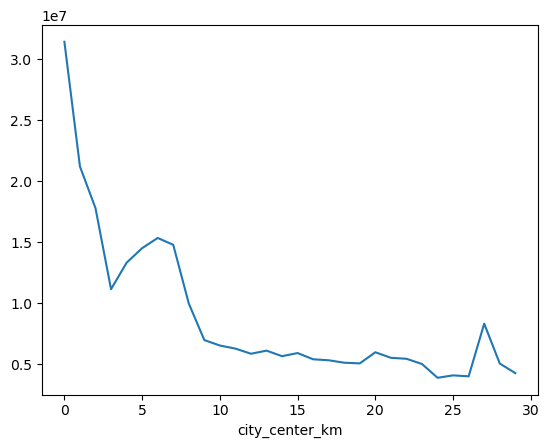

In [180]:
data[data['locality_name']=='Санкт-Петербург'].groupby('city_center_km')['last_price'].mean().plot()

Центр очерчен радиусом примерно 3 км, судя по графику. Изменение цены за объект недвижимости, наглядно показано на графике.

### Общий вывод

В этом проекте были изучен рынок недвижимости в Санкт-Петербурге и Ленинградской области за 2014-2019 годы.

В ходе начального этапа была проведена работа с пропусками и аномальными значениями.

Были изменены типы данных в соотвествии с содержащейся в колонках информацией: данные типа float в большинстве случаев были приведены к целочисленным значениям int; колонка, содержащая дату и время публикации объявлений приведена к формату datetime.

Были добавлены новые колонки, обозначающие цену квадратного метра, день недели, месяц и год публикации объявления, соотношение жилой площади к общей площади, а также отношение площади кухни к общей.

Были проанализированы площадь(общая, жилая, кухни), цена, число комнат и высота потолков в объектах недвижимости. Большинство квартир (более 70% всех объявлений) имеет площадь от 30 до 70 м2. Квартиры больше или меньше этого диапазона в базе данных распространены значительно реже. Медианный объект недвижимости имеет 2 комнаты с потолками около 2.65 м и стоит около 4.65 млн. рублей.

Как правило, объект недвижимости продается в течение полугода после публикации. Медианная квартира продается за 95 дней. Было принято считать быстрой продажей продажу в течение 17 дней, а долгой - продажу, которая затянулась более, чем на полтора года.

На стоимость объекта недвижимости влияют достаточно очевидные факторы: площадь, количество комнат, этаж (квартиры на первом этаже стоят дешевле), приближенность к центру города. Можно предположить, что день и месяц размещения объявления навряд ли оказывают влияние на стоимость. А между годом размещения и стоимостью квартиры взаимосвязь, вероятно, присутствует: если с 2016 по 2018 год квартиры в среднем стоили примерно одинаково (4.5-4.6 млн.), то в 2019 году они подорожали до 5.1 млн.

Неудивительно, что наибольшее количество объявлений опубликовано для Санкт-Петербурга - 68.8% от всех объявлений. А вот по цене за квадратный метр жилья Санкт-Петербург в топе-3, вместе с  Зеленогорском и Репино. В числе аутсайдеров три маленьких областных населённых пункта - Вахнова Кара, Свирь и Старополье.

В рамках проекта также стояла задача определить центр города. Высказывается предположение, что центром города можно назвать всё, что располагается в радиусе 3 км. от центральной точки координат Санкт-Петербурга.